Discourse-semantics of *risk* in the *New York Times*, 1963&ndash;2014
==========================================

**[Daniel McDonald](mailto:mcdonaldd@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project), [Jens Zinn](mailto:jzinn@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project)**
--------------------------

<br>

> **SUMMARY:** This *IPython Notebook* demonstrates the findings from our investigation of *risk* in the NYT, as well as the code used to generate these findings. If you have the necessary dependencies installed, you can also use this notebook to interrogate and visualise the corpus yourself. 

### Setup

If you haven't already done so, the first things we need to do are **install corpkit**, download data for NLTK's tokeniser, and **unzip our corpus**.

In [ ]:
# install corpkit with either pip or easy_install
! easy_install -u corpkit

In [ ]:
# download nltk tokeniser data
import nltk
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
# unzip and untar our data
! gzip -dc data/nyt.tar.gz | tar -xf - -C data

Great! Now we have everything we need to start.

## Orientation

 Let's import the functions we'll be using to investigate the corpus. These functions are designed for this interrogation, but also have more general use in mind, so you can likely use them on your own corpora.

| **Function name** | Purpose                            | |
| ----------------- | ---------------------------------- | |
| `interrogator()`  | interrogate parsed corpora         | |
| `editor()`        | edit `interrogator()` results         | |
| `plotter()`       | visualise `interrogator()` results | |
| `quickview()`     | view `interrogator()` results      | |
| `conc()`          | complex concordancing of subcorpora | |
| `keywords()`          | get keywords and ngrams from `conc()` output | |
| `collocates()`          | get collocates from `conc()` output| |
| `quicktree()`          | visually represent a parse tree | |
| `searchtree()`          | search a parse tree with a Tregex query | |

In [1]:
import pandas as pd
from IPython.display import clear_output

import corpkit
from corpkit import (interrogator, editor, plotter, quickview, 
                    conc, keywords, colls, save_result, load_result)

# show figures in browser
% matplotlib inline

Next, let's set the path to our corpus. If you were using this interface for your own corpora, you would change this to the path to your data.

In [2]:
# corpus of every article, with annual subcorpora
annual_trees = 'data/nyt/years'

Let's also quickly set some options for displaying raw data:

In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)
pd.set_option('max_colwidth',70)
pd.set_option('display.width', 1000)
pd.set_option('expand_frame_repr', False)

We can also quickly load all of our saved results as a dictionary. It's handy to make the name short:

In [6]:
from corpkit import load_all_results
r = load_all_results()

12:26:12: adj_modifiers.p loaded as adj_modifiers.
12:26:12: adj_riskwords.p loaded as adj_riskwords.
12:26:12: all_govs.p loaded as all_govs.
12:26:12: allwords.p loaded as allwords.
12:26:12: at_risk_things.p loaded as at_risk_things.
12:26:12: baseline.p loaded as baseline.
12:26:12: edited_adj_riskwords.p loaded as edited_adj_riskwords.
12:26:12: functional_role.p loaded as functional_role.
12:26:13: kwds.p loaded as kwds.
12:26:13: modals.p loaded as modals.
12:26:13: modals_lemmatised.p loaded as modals_lemmatised.
12:26:13: modifiers.p loaded as modifiers.
12:26:13: n_atrisk_n.p loaded as n_atrisk_n.
12:26:14: ngms.p loaded as ngms.
12:26:23: noun_lemmata.p loaded as noun_lemmata.
12:26:23: predicators.p loaded as predicators.
12:26:23: proc_w_risk_part.p loaded as proc_w_risk_part.
12:26:23: processes.p loaded as processes.
12:26:26: propernouns.p loaded as propernouns.
12:26:26: relationals.p loaded as relationals.
12:26:26: risk_objects.p loaded as risk_objects.
12:26:27: ris

### Quickstart

Let's start off with some quick examples. By the end of this Notebook, you should be more than capable of reproducing even the most complex examples!

#### Interrogating the corpus (and saving the result)

In [19]:
# interrogate
modals = interrogator(annual_trees, 'words', 'MD < __')
# save
save_result(modals, 'modals')
# view
quickview(modals)

 00:20:20: Finished! 17 unique results, 280433 total.

00:20:20: Data saved: data/saved_interrogations/modals.p

  0: would (n=65161)
  1: will (n=49031)
  2: can (n=44432)
  3: could (n=37139)
  4: may (n=26869)
  5: should (n=20450)
  6: might (n=16907)
  7: must (n=9083)
  8: ca (n=3838)
  9: 'll (n=2506)
 10: 'd (n=2196)
 11: wo (n=1948)
 12: ought (n=547)
 13: need (n=182)
 14: shall (n=133)
 15: dare (n=6)
 16: shalt (n=5)


#### Edit results

In [7]:
# simple stuff: make relative frequencies for individual or total results
rel_modals = editor(modals.results, '%', modals.totals)

# trickier: make an 'others' result from low-total entries
low_indices = [i for i, w in enumerate(list(modals.results.index)) if i > 6]
each_modal_total = editor(modals.results, '%', modals.totals, merge_entries = low_indices, 
                          newname = 'other', just_totals = True)

# complex stuff: merge results
entries_to_merge = [r'(^w|\'ll|\'d)', r'^c', r'^m[^d]', r'^sh']
for regex in entries_to_merge:
    modals = editor(modals.results, merge_entries = regex)
    
# complex stuff: merge subcorpora
subcorpora_to_merge = [('1960s', r'^196'), ('1980s', r'^198'), ('1990s', r'^199'), 
                       ('2000s', r'^200'), ('2010s', r'^201')]
for subcorp, search in subcorpora_to_merge:
    modals = editor(modals.results, merge_subcorpora = search, new_subcorpus_name=subcorp)
    
# make relative, sort, remove what we don't want
modals = editor(modals.results, '%', modals.totals,
                 just_subcorpora = [n for n, s in subcorpora_to_merge], sort_by = 'total', keep_top = 4)

# clear output and show results
clear_output()
print rel_modals.results, each_modal_total.results, '\n\n', modals.results

          would       will        can      could  ...        need     shall      dare  shalt
1963  22.326833  23.537323  17.955615   6.590451  ...    0.000000  0.537996  0.000000      0
1987  24.750614  18.505132  15.512505  11.117537  ...    0.072286  0.260228  0.014457      0
1988  23.138986  19.257117  16.182067  11.219364  ...    0.091338  0.060892  0.000000      0
1989  22.766053  19.368358  15.371950  11.749738  ...    0.134710  0.014968  0.014968      0
1990  24.631154  18.061811  15.716726  12.253456  ...    0.062121  0.046591  0.000000      0
...         ...        ...        ...        ...  ...         ...       ...       ...    ...
2010  24.989858  17.200811  15.388776  14.171738  ...    0.108181  0.067613  0.000000      0
2011  23.185818  17.574289  15.584747  14.577222  ...    0.089274  0.000000  0.000000      0
2012  23.097345  16.283186  15.132743  15.353982  ...    0.029499  0.029499  0.000000      0
2013  22.136269  17.286522  16.349301  15.620351  ...    0.029753  0.0

### Plot results

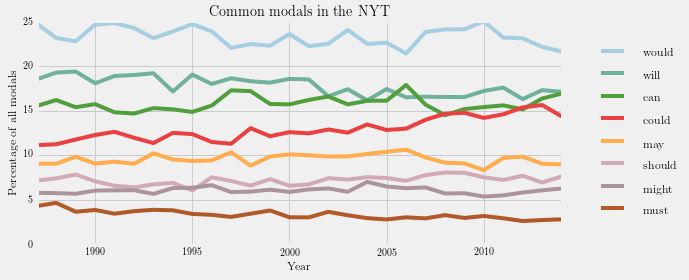

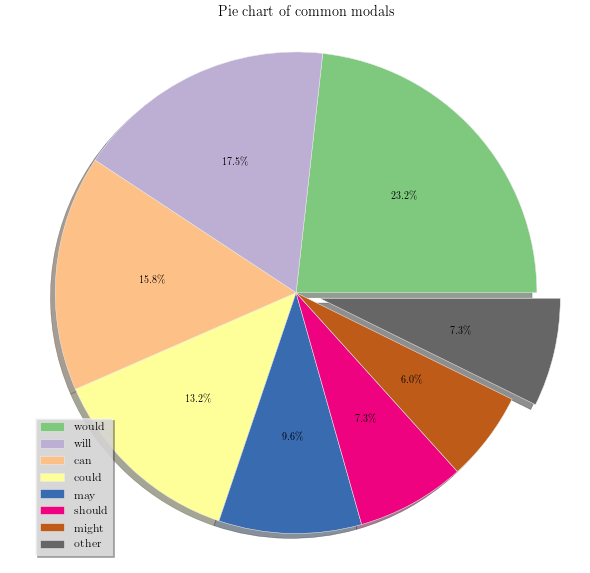

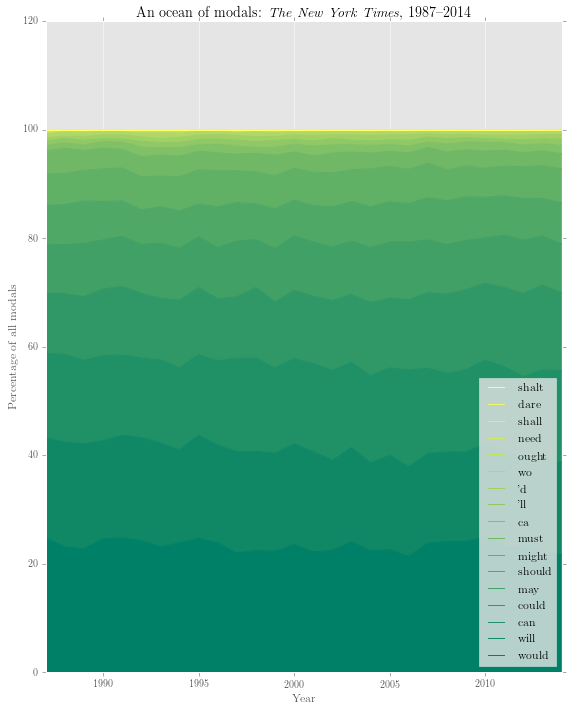

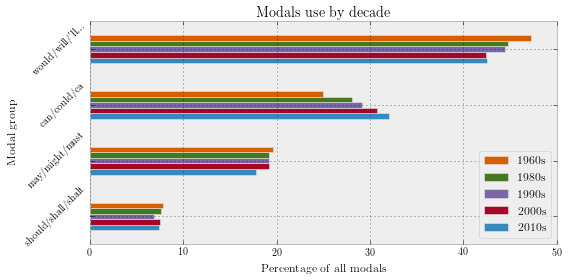

In [8]:
# line chart
plotter('Common modals in the NYT', rel_modals.results.drop('1963'), y_label = 'Percentage of all modals', 
        style = 'fivethirtyeight', num_to_plot = 8, legend_pos = 'outside upper right', 
        show_totals = 'both', interactive = True)

# pie chart
plotter('Pie chart of common modals', each_modal_total.results, explode = ['other'], shadow = True,
    num_to_plot = 'all', kind = 'pie', colours = 'Accent', figsize = (8, 8), show_totals = 'plot')

# stacked area chart
plotter('An ocean of modals: \emph{The New York Times}, 1987--2014', rel_modals.results.drop('1963'), kind = 'area', 
    stacked = True, colours = 'summer', figsize = (8, 10), num_to_plot = 'all', 
    legend_pos = 'lower right', y_label = 'Percentage of all modals')

# bar chart, transposing and reversing the data
plotter('Modals use by decade', modals.results.iloc[::-1].T.iloc[::-1], kind = 'barh',
    x_label = 'Percentage of all modals', y_label = 'Modal group', style = 'bmh')

As you can see, there's a lot to do. These results all came from one very simple query! So, let's begin.

### The report

The focus of this notebook is our methodology and findings during our 2014 research project. These parts of the project are contextualised and elaborated upon in our written report. Depending on your browser's capabilities/settings, the following will download or display our report:

In [ ]:
from corpkit import report_display
report_display()

### The data

Our main corpus is comprised of paragraphs from *New York Times* articles that contain a risk word, which we have defined by regular expression as `'(?i)'.?\brisk.?\b'`. This includes *low-risk*, or *risk/reward* as single tokens, but excludes *brisk* or *asterisk*.

The data comes from a number of sources.

* 1963 editions were downloaded from ProQuest Newsstand as PDFs. Optical character recognition and manual processing was used to create a set of 1200 risk sentences.
* The 1987&ndash;2006 editions were taken from the *NYT Annotated Corpus*.
* 2007&ndash;2014 editions were downloaded from *ProQuest Newsstand* as HTML.

In total, 149,504 documents were processed. The corpus from which the risk corpus was made is over 150 million words in length!

The texts have been parsed for part of speech and grammatical structure by [`Stanford CoreNLP*](http://nlp.stanford.edu/software/corenlp.shtml). In this Notebook, we are only working with the parsed versions of the texts. We rely on [*Tregex*](http://nlp.stanford.edu/~manning/courses/ling289/Tregex.html) to interrogate the corpora. Tregex allows very complex searching of parsed trees, in combination with [Java Regular Expressions](http://docs.oracle.com/javase/7/docs/api/java/util/regex/Pattern.html). It's definitely worthwhile to learn the Tregex syntax, but in case you're time-poor, at the end of this notebook are a series of Tregex queries that you can copy and paste into `interrogator()` and `conc()` queries.

### Interrogating the corpus

So, let's start by finding out how many words we have in each subcorpus. To do this, we'll interrogate the corpus using `interrogator()`. Its most important arguments are:

1. **path to corpus**

2. Tregex **options**:
  * **'t/w/words'**: return only words
  * **'c/count'**: return a count of matches
  * **'p/pos'**: return only the tag
  * **'b/both'**: return tag and word together

3. a **Tregex query**

We only need to count tokens, so we can use the `'count'` option (it's often faster than getting lists of matching tokens). The cell below will run `interrogator()` over each annual subcorpus and count the number of matches for the query.

Some common Tregex patterns have been predefined. Searching for `'any'` will find any word in the corpus and count it.

In [4]:
allwords = interrogator(annual_trees, 'count', 'any') 

When the interrogation has finished, we can view our results:

In [55]:
# from the allwords results, print the totals
allwords.totals

1963     83325
1987    481830
1988    450872
...
2012    995546
2013    978308
2014    623268
Name: Total, Length: 29, dtype: int64

If you want to see the query and options that created the results, you can use:

In [60]:
allwords.query

{'datatype': numpy.int64,
 'dep_type': 'basic-dependencies',
 'dictionary': 'bnc.p',
 'function_filter': False,
 'lemmatag': False,
 'lemmatise': False,
 'options': 'count',
 'path': 'data/nyt/years',
 'phrases': False,
 'plaintext': False,
 'query': '/.?[A-Za-z0-9].?/ !< __',
 'quicksave': False,
 'spelling': False,
 'table_size': 50,
 'time_ended': '2015-06=09 18:04:32',
 'time_started': '2015-06=09 17:55:03',
 'titlefilter': False,
 'translated_options': 'C'}

You could even run the same query again by passing this dictionary back into `interrogator()`:

In [ ]:
# again = interrogator(**allwords.query)

### Plotting results

Lists of years and totals are pretty dry. Luckily, we can use the `plotter()` function to visualise our results. At minimum, `plotter()` needs two arguments:

1. a title (in quotation marks)
2. a list of results to plot

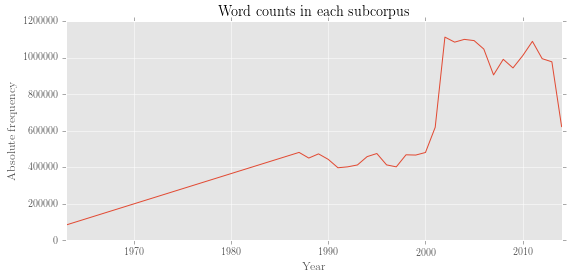

In [6]:
plotter('Word counts in each subcorpus', allwords.totals)

Because we have smaller samples for 1963 and 2014, we might want to project them. To do that, we can pass subcorpus names and projection values to `editor()`:


***Processing results***

Projection: 1963 * 5
Projection: 2014 * 1.37


***Done!***



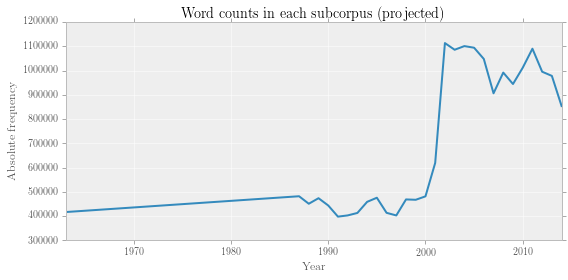

In [147]:
proj_vals = [(1963, 5), (2014, 1.37)]
projected = editor(allwords.totals, projection = proj_vals)
plotter('Word counts in each subcorpus (projected)', projected.totals, style = 'bmh')

Great! So, we can see that the number of words per year varies quite a lot, even after projection. That's worth keeping in mind.

### Frequency of risk words in the NYT

Next, let's count the total number of risk words. Notice that we are using the `'both'` flag, instead of the `'count'` flag, because we want both the word and its tag.

In [10]:
# our query:
riskwords_query = r'__ < /(?i).?\brisk.?\b/' # any risk word and its word class/part of speech
# get all risk words and their tags :
riskwords = interrogator(annual_trees, 'both', riskwords_query)

 21:50:17: Finished! 565 unique results, 356542 total.


Even when do not use the `count` flag, we can access the total number of matches as before:

In [11]:
riskwords.totals

1963     1476
1987     7511
1988     7226
1989     7559
1990     7841
1991     7005
1992     6861
1993     6921
1994     7024
1995     7074
1996     6942
1997     7014
1998     7996
1999     7827
2000     8057
2001    10412
2002    19802
2003    19222
2004    19126
2005    19290
2006    19032
2007    18342
2008    19516
2009    18752
2010    19510
2011    20738
2012    18606
2013    18454
2014    11406
Name: Total, dtype: int64

At the moment, it's hard to tell whether or not these counts are simply because our annual NYT samples are different sizes. To account for this, we can calculate the percentage of parsed words that are risk words. This means combining the two interrogations we have already performed.

We can do this by using `editor()`:

In [149]:
rel_riskwords = editor(riskwords.totals, '%', allwords.totals)
print rel_riskwords.totals


***Processing results***


***Done!***

1963    1.771377
1987    1.558849
1988    1.602672
...
2012    1.868924
2013    1.886318
2014    1.830031
Name: Total, Length: 29, dtype: float64


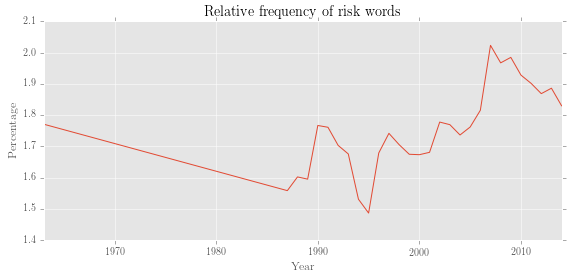

In [9]:
plotter('Relative frequency of risk words', rel_riskwords.totals)

That's more helpful. We can now see some interesting peaks and troughs in the proportion of risk words. We can also see that 1963 contains the highest proportion of risk words. This is because the manual corrector of 1963 OCR entries preserved only the sentence containing risk words, rather than the paragraph.

Here are two methods for excluding 1963 from the chart:

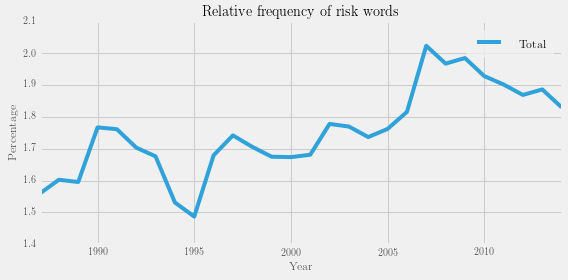

In [152]:
# using Pandas syntax:
plotter('Relative frequency of risk words', rel_riskwords.totals.drop('1963'), 
        legend = True, style = 'fivethirtyeight')

# the other way: using editor()
#rel_riskwords = editor(rel_riskwords.totals, skip_subcorpora = [1963])
#plotter('Relative frequency of risk words', rel_riskwords.totals)

Perhaps we're interested in not only the frequency of risk words, but the frequency of different *kinds* of risk words. We actually already collected this data during our last `interrogator()` query.

We can print just the first few entries of the results list, rather than the totals list.

In [40]:
# using Pandas syntax:
riskwords.results.head(10)

,(nn risk),(nns risks),(jj risky),(vb risk),...,(nn risk-evaluation),(nn risk-gd),(nn risk-hedging),(cd 410-risk)
1963,740,404,65,142,...,0,1,0,1
1987,4116,1612,549,493,...,0,0,0,0
1988,4049,1453,511,450,...,0,0,1,0
1989,4164,1534,543,512,...,0,0,0,0
1990,4223,1508,612,530,...,0,0,0,0
1991,3825,1372,530,483,...,0,0,0,0
1992,3578,1533,545,492,...,0,0,0,0
1993,3822,1426,546,444,...,0,0,0,0
1994,3837,1507,604,447,...,0,0,0,0
1995,3905,1429,632,400,...,0,0,0,0


In [41]:
# using quickview
from corpkit import quickview
quickview(riskwords.results, n = 10)

  0: (nn risk) (n=204305)
  1: (nns risks) (n=76105)
  2: (jj risky) (n=22134)
  3: (vb risk) (n=19621)
  4: (jj high-risk) (n=7951)
  5: (vbp risk) (n=4294)
  6: (vbz risks) (n=3414)
  7: (nn risk-taking) (n=2204)
  8: (nnp risk) (n=1843)
  9: (jj low-risk) (n=1657)


So, let's use this data to do some more serious plotting:

In [12]:
frac1 = editor(riskwords.results, '%', riskwords.totals)
# alternative syntax:
# frac1 = editor(riskwords.results, '%', 'self')


***Processing results***


***Done!***



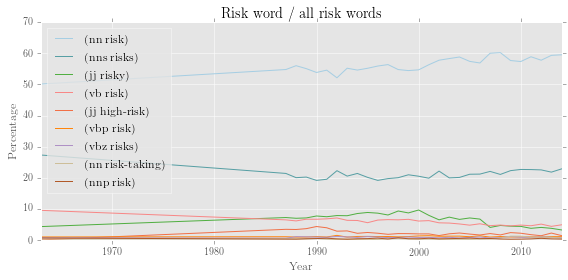

In [13]:
# colormap is used for > 7 results
plotter('Risk word / all risk words', frac1.results, num_to_plot = 9)

If `plotter()` can't find a good spot for the legend, you can explicitly move it:

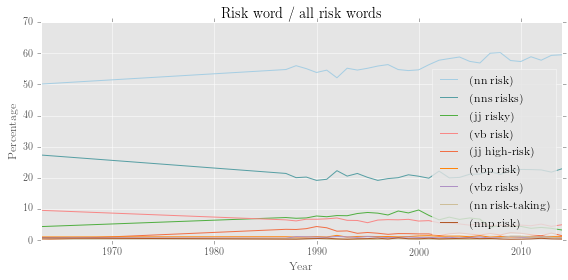

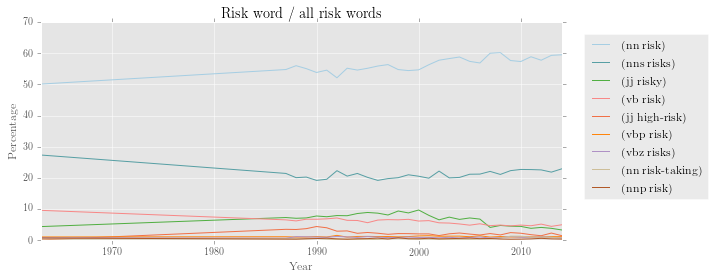

In [14]:
plotter('Risk word / all risk words', frac1.results, num_to_plot = 9, legend_pos = 'lower right', figsize = (8, 4))
plotter('Risk word / all risk words', frac1.results, num_to_plot = 9, legend_pos = 'outside right', figsize = (8, 4)) # 'o r' for short

In [154]:
frac2 = editor(riskwords.results, '%', allwords.totals, sort_by = 'total')


***Processing results***


***Done!***



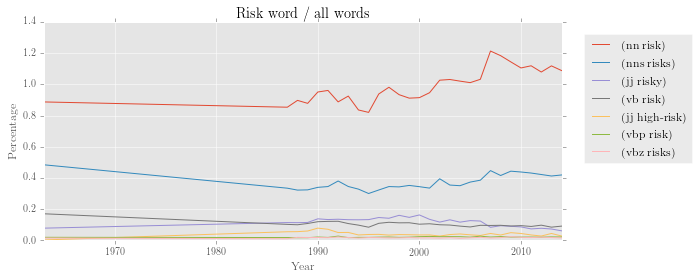

In [16]:
plotter('Risk word / all words', frac2.results, legend_pos = 'outside right')

Another neat feature is the `.table` attribute of interrogations, which shows the most common `n` results in each subcorpus:

In [55]:
riskwords.table

,1963,1987,1988,1989,...,2011,2012,2013,2014
0,(nn risk),(nn risk),(nn risk),(nn risk),...,(nn risk),(nn risk),(nn risk),(nn risk)
1,(nns risks),(nns risks),(nns risks),(nns risks),...,(nns risks),(nns risks),(nns risks),(nns risks)
2,(vb risk),(jj risky),(jj risky),(jj risky),...,(vb risk),(vb risk),(vb risk),(vb risk)
3,(jj risky),(vb risk),(vb risk),(vb risk),...,(jj risky),(jj risky),(jj risky),(jj risky)
4,(vbp risk),(jj high-risk),(jj high-risk),(jj high-risk),...,(jj high-risk),(jj high-risk),(jj high-risk),(jj high-risk)
...,...,...,...,...,...,...,...,...,...
45,,(nnps risks),(nn risk-taker.),(nn risk-sharing),...,(jj risk-hungry),(jj value-at-risk),(nnp at-risk),(jj risk-increasing)
46,,(nn risk-assessment),(jj risk-control),(jj risk-factor),...,(nns risk-models),(jj market-risk),(vb de-risk),(nn risk-prediction)
47,,(jj risk-adverse),(nn risk-hedging),(jj risk-waiver),...,(nnp low-risk),(jj lowest-risk),(jj risk-wary),(nn risk/benefit)
48,,(nn risk-management),(nn less-risky),(nn risk-to-reward),...,(jj risk-to-capital),(nnp at-risk),(jj risk-on),(jj risk-damping)


### Customising visualisations

By default, `plotter()` plots the seven most frequent results, including 1963.

 We can use other `plotter()` arguments to customise what our chart shows. `plotter()`'s possible arguments are:

| `plotter()` argument | Mandatory/default?       |  Use          | Type  |
| :------|:------- |:-------------|:-----|
| `title` | **mandatory**      | A title for your plot | string |
| `results` | **mandatory**      | the results you want to plot | `interrogator()` or `editor()` output |
| `num_to_plot` | 7    | Number of top entries to show     |  int |
| `x_label` | False    | custom label for the x-axis     |  str |
| `y_label` | False    | custom label for the y-axis     |  str |
| `figsize` | (13, 6) | set the size of the figure | tuple: `(length, width)`|
| `tex` | `'try'` | use *TeX* to generate image text | boolean |
| `style` | `'ggplot'` | use Matplotlib styles | str: `'dark_background'`, `'bmh'`, `'grayscale'`, `'ggplot'`, `'fivethirtyeight'` |
| `legend_pos` | `'default'` | legend position | str: `'outside right'` to move legend outside chart |
| `show_totals` | `False` | Print totals on legend or plot where possible | str: '`legend`', '`plot`', '`both`', or 'False' |
| `save` | `False` | Save to file | `True`: save as `title`.png. str: save as `str` |
| `colours` | `'Paired'` | plot colours | str: any of Matpltlib's colormaps |
| `cumulative` | `False` | plot entries cumulatively | bool |
| `**kwargs` | False | pass other options to Pandas plot/Matplotlib | `rot = 45`, `subplots = True`, `fontsize = 16`, etc. |

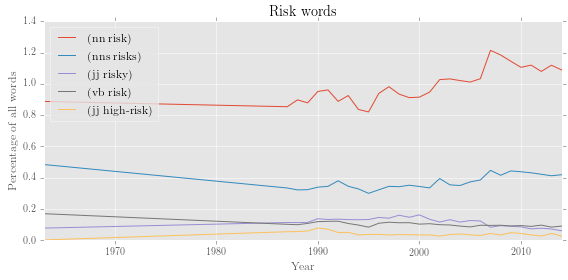

In [17]:
plotter('Risk words', frac2.results, num_to_plot = 5, y_label = 'Percentage of all words')

Keyword arguments for Pandas and matplotlib can also be used:


23:33:18: images/risk-words.png created.


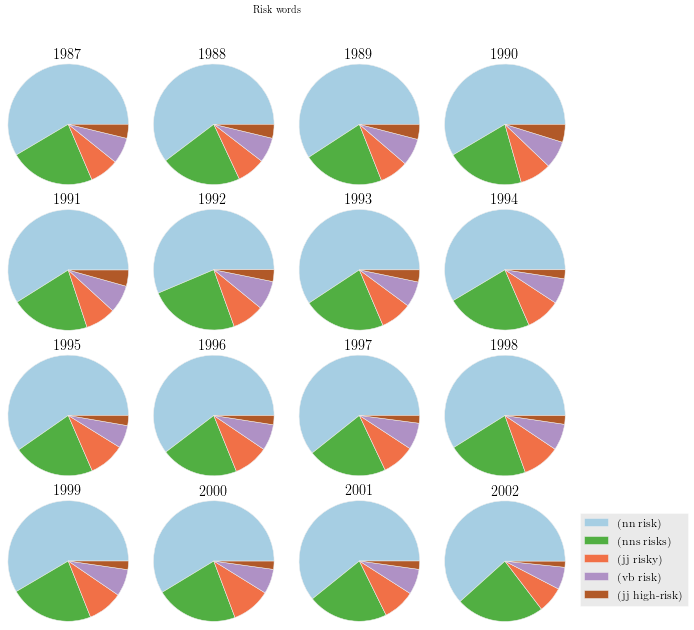

In [103]:
plotter('Risk words', frac2.results.drop('1963').T.head(5), subplots = True, 
        layout = (4,4), figsize = (10, 10), num_to_plot = 16, kind='pie', pie_legend = True, save = True)

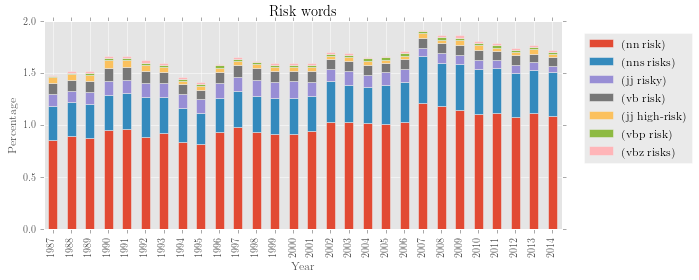

In [22]:
plotter('Risk words', frac2.results.drop('1963'), kind = 'bar', stacked = True, legend_pos = 'o r')

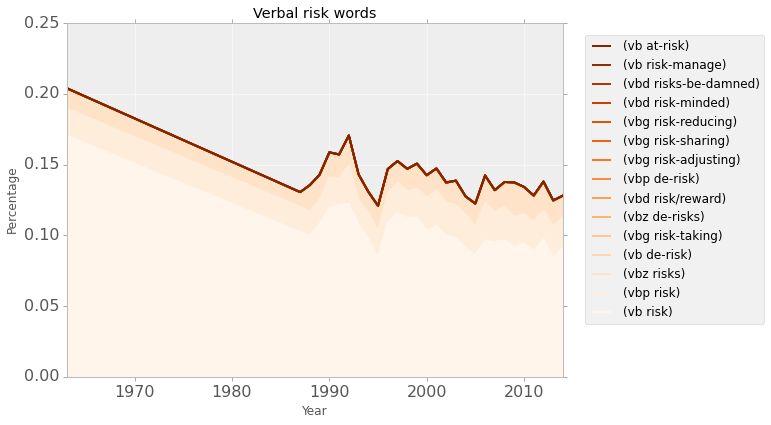

In [156]:
plotter('Verbal risk words', editor(frac2.results, just_entries= r'^\(v', print_info = False).results, 
        kind = 'area', stacked = True, legend_pos = 'o r', colours = 'Oranges', num_to_plot = 'all', 
        fontsize = 16, tex = False, figsize = (8, 6), style = 'bmh')


08:36:30: images/nominalisation-of-risk-emphthe-new-york-times-19872014.png created.


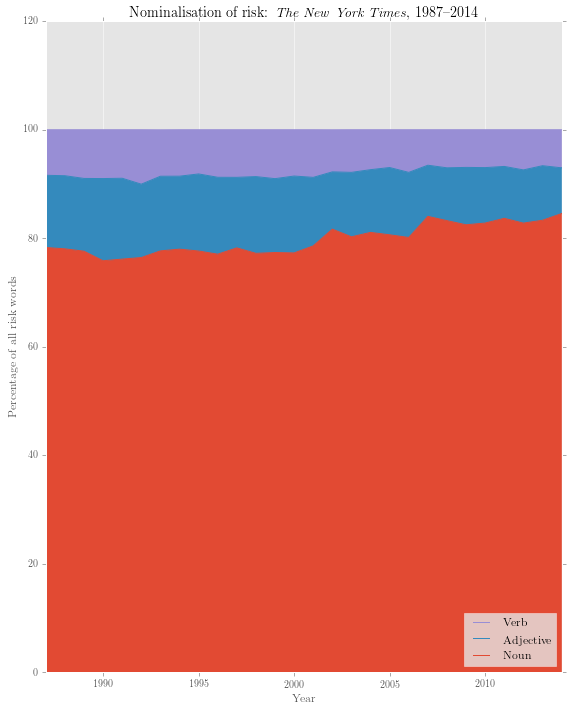

In [38]:
letters = [('Adjective', 'j'),
           ('Noun', 'n'),
           ('Verb', 'v')]

for label, letter in letters:
    riskwords = editor(riskwords.results, merge_entries = r'^\(' + letter, newname = label, print_info = False)
    
wordclasses = editor(riskwords.results, '%', riskwords.totals, just_entries = [n for n, l in letters], sort_by = 'total', print_info = False)

plotter('Nominalisation of risk: \emph{The New York Times}, 1987--2014', wordclasses.results.drop('1963'), 
        kind = 'area', stacked = True, figsize = (8, 10), num_to_plot = 'all', 
        legend_pos = 'lower right', y_label = 'Percentage of all risk words', save = True)

Those already proficient with Python can use Pandas' `plot()` function [(docs)](http://pandas.pydata.org/pandas-docs/stable/visualization.html) if they like.

Another neat thing you can do is save the results of an interrogation, so they don't have to be run the next time you load this notebook:

In [31]:
# specify what to save, and a name for the file.
from corpkit import save_result, load_result
save_result(allwords, 'allwords')


 08:35:20: Data saved: data/saved_interrogations/allwords.p



You can then load these results:

In [32]:
fromfile_allwords = load_result('allwords')
fromfile_allwords.totals

1963     83325
1987    481830
1988    450872
...
2012    995546
2013    978308
2014    623268
Name: Total, Length: 29, dtype: int64

... or erase them from memory:

In [35]:
fromfile_allwords = None
fromfile_allwords

### `quickview()`

`quickview()` is a function that quickly shows the n most frequent items in a list. Its arguments are:

1. `interrogator()` or `editor()` output (preferably, the whole interrogation, not just the `.results` branch.)
2. number of results to show (default = 25)

In [39]:
quickview(riskwords, n = 15)

  0: (nn risk) (n=204305)
  1: (nns risks) (n=76105)
  2: (jj risky) (n=22134)
  3: (vb risk) (n=19621)
  4: (jj high-risk) (n=7951)
  5: (vbp risk) (n=4294)
  6: (vbz risks) (n=3414)
  7: (nn risk-taking) (n=2204)
  8: (nnp risk) (n=1843)
  9: (jj low-risk) (n=1657)
 10: (jj at-risk) (n=1498)
 11: (jj risk-free) (n=1347)
 12: (jj risk-averse) (n=1258)
 13: (jj risk-taking) (n=1242)
 14: (nnp risky) (n=1198)


The number shown next to the item is its index. You can use this number to refer to an entry when editing results.

### `editor()`

Results lists can be edited quickly with `editor()`. It has a lot of different options:

 | `editor()` argument | Mandatory/default?       |  Use          | Type  |
 | :------|:------- |:-------------|:-----|
 | `df` | **mandatory**      | the results you want to edit | `interrogator()` or `editor` output |
 | `operation` | '%'      | if using second list, what operation to perform | `'+', '-', '/', '*' or '%'` |
 | `df2` | False      | Results to comine in some way with `df` | `interrogator()` or `editor` output (usually, a `.totals` branch) |
 | `just_subcorpora` | False    |   Subcorpora to keep   |  list |
 | `skip_subcorpora` | False    |   Subcorpora to skip   |  list |
 | `merge_subcorpora` | False    |   Subcorpora to merge   |  list |
 | `new_subcorpus_name` | False    |   name for merged subcorpora   |  index/str |
 | `just_entries` | False    |   Entries to keep   |  list |
 | `skip_entries` | False    |   Entries to skip   |  list |
 | `merge_entries` | False    |   Entries to merge   |  list of words or indices/a regex to match |
 | `sort_by` | False    |   sort results   |  str: `'total', 'infreq', 'name', 'increase', 'decrease'` |
 | `keep_top` | False    |   Keep only top n results after sorting   |  int |
 | `just_totals` | False    |   Collapse all subcorpora, return Series   | bool |
 | `projection` | False    |   project smaller subcorpora   |  list of tuples: [`(subcorpus_name, projection_value)]` |
 | `**kwargs` | False    |   pass options to *Pandas*' `plot()` function, *Matplotlib*   |  various |

First, we can select specific subcorpora to keep, remove or span:

Let's try these out on a new interrogation. The query below will get adjectival risk words:

In [42]:
adj = r'/JJ.?/ < /(?i)\brisk/'
adj_riskwords = interrogator(annual_trees, 'words', adj, quicksave = 'adj_riskwords')

 08:47:32: Finished! 355 unique results, 45604 total.

 08:47:32: Data saved: data/saved_interrogations/adj_riskwords.p



In [43]:
editor(adj_riskwords.results, skip_subcorpora = [1963, 1987, 1988]).results


***Processing results***

Skipping 3 subcorpora:
    1963
    1987
    1988


***Done!***



,risky,high-risk,riskier,low-risk,...,medical-risk,ultra-high-risk,middle-risk,risk-and-profit-sharing
1989,543,283,65,35,...,0,0,0,0
1990,612,347,84,40,...,0,0,0,0
1991,530,282,81,46,...,0,0,0,0
1992,545,201,53,28,...,1,1,0,0
1993,546,209,78,42,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010,872,444,194,90,...,0,0,0,0
2011,798,376,162,110,...,0,0,0,0
2012,770,274,172,154,...,0,0,0,0
2013,710,430,148,106,...,0,0,0,0


In [44]:
editor(adj_riskwords.results, just_subcorpora = [1963, 1987, 1988]).results


***Processing results***

Keeping 3 subcorpora:
    1963
    1987
    1988


***Done!***



,risky,high-risk,riskier,low-risk,...,medical-risk,ultra-high-risk,middle-risk,risk-and-profit-sharing
1963,65,2,3,1,...,0,0,0,0
1987,549,265,49,43,...,0,0,0,0
1988,511,251,44,38,...,0,0,0,0


In [45]:
editor(adj_riskwords.results, span_subcorpora = [2000, 2010]).results


***Processing results***

Keeping subcorpora:
    2000--2010


***Done!***



,risky,high-risk,riskier,low-risk,...,medical-risk,ultra-high-risk,middle-risk,risk-and-profit-sharing
2000,784,166,75,25,...,0,0,0,0
2001,834,215,98,50,...,0,0,0,0
2002,1302,302,174,68,...,0,0,0,0
2003,1430,402,190,54,...,0,0,0,0
2004,1284,448,186,72,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2006,1296,326,184,80,...,0,0,0,0
2007,758,398,140,60,...,0,0,0,0
2008,930,338,176,82,...,0,0,0,0
2009,850,464,200,82,...,0,0,0,0


We can do similar kinds of things with each *result*:

In [46]:
quickview(adj_riskwords.results)

  0: risky (n=22134)
  1: high-risk (n=7951)
  2: riskier (n=3221)
  3: low-risk (n=1657)
  4: at-risk (n=1498)
  5: risk-free (n=1347)
  6: risk-averse (n=1258)
  7: risk-taking (n=1242)
  8: riskiest (n=995)
  9: risk-based (n=361)
 10: higher-risk (n=337)
 11: risk-management (n=324)
 12: risk-adjusted (n=256)
 13: risk-reward (n=240)
 14: risk-weighted (n=186)
 15: risk-benefit (n=151)
 16: no-risk (n=151)
 17: lower-risk (n=148)
 18: highest-risk (n=148)
 19: riskless (n=128)
 20: moderate-risk (n=58)
 21: assigned-risk (n=54)
 22: risk-off (n=52)
 23: risk-sharing (n=49)
 24: reduced-risk (n=47)


In [47]:
editor(adj_riskwords.results, skip_entries = [2, 5, 6]).results


***Processing results***

Skipping 3 entries:
    riskier
    risk-free
    risk-averse


***Done!***



,risky,high-risk,low-risk,at-risk,...,medical-risk,ultra-high-risk,middle-risk,risk-and-profit-sharing
1963,65,2,1,0,...,0,0,0,0
1987,549,265,43,12,...,0,0,0,0
1988,511,251,38,27,...,0,0,0,0
1989,543,283,35,10,...,0,0,0,0
1990,612,347,40,19,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010,872,444,90,102,...,0,0,0,0
2011,798,376,110,106,...,0,0,0,0
2012,770,274,154,118,...,0,0,0,0
2013,710,430,106,132,...,0,0,0,0


In [48]:
editor(adj_riskwords.results, just_entries = [2, 5, 6]).results


***Processing results***

Keeping 3 entries:
    riskier
    risk-free
    risk-averse


***Done!***



,riskier,risk-free,risk-averse
1963,3,3,0
1987,49,29,10
1988,44,31,11
1989,65,21,8
1990,84,23,9
...,...,...,...
2010,194,112,72
2011,162,134,90
2012,172,56,90
2013,148,58,70


We can also use the words themselves, rather than indices, for all of these operations:

In [49]:
editor(adj_riskwords.results, just_entries = ['risky', 'riskier', 'riskiest']).results


***Processing results***

Keeping 3 entries:
    risky
    riskier
    riskiest


***Done!***



,risky,riskier,riskiest
1963,65,3,0
1987,549,49,16
1988,511,44,12
1989,543,65,15
1990,612,84,14
...,...,...,...
2010,872,194,38
2011,798,162,32
2012,770,172,36
2013,710,148,54


Or, we can use Regular Expressions:

In [50]:
# skip any that start with 'r'
editor(adj_riskwords.results, skip_entries = r'^r').results


***Processing results***

Skipping 176 entries:
    risky
    riskier
    risk-free
    risk-averse
    risk-taking
    riskiest
    risk-based
    risk-management
    risk-adjusted
    risk-reward
... and 166 more ... 


***Done!***



,high-risk,low-risk,at-risk,higher-risk,...,ultra-low-risk,medical-risk,ultra-high-risk,middle-risk
1963,2,1,0,1,...,0,0,0,0
1987,265,43,12,4,...,0,0,0,0
1988,251,38,27,8,...,0,0,0,0
1989,283,35,10,8,...,0,0,0,0
1990,347,40,19,8,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010,444,90,102,22,...,0,0,0,0
2011,376,110,106,22,...,0,0,0,0
2012,274,154,118,26,...,0,0,0,0
2013,430,106,132,26,...,0,0,0,0


We can also merge entries, and specify a new name for the merged items. In lieu of a name, we can pass an index. 

In [51]:
editor(adj_riskwords.results, merge_entries = [2, 5, 6], newname = 'New name').results


***Processing results***

Merging 3 entries as "New name":
    riskier
    risk-free
    risk-averse


***Done!***



,risky,high-risk,low-risk,at-risk,...,ultra-high-risk,middle-risk,risk-and-profit-sharing,New name
1963,65,2,1,0,...,0,0,0,6
1987,549,265,43,12,...,0,0,0,88
1988,511,251,38,27,...,0,0,0,86
1989,543,283,35,10,...,0,0,0,94
1990,612,347,40,19,...,0,0,0,116
...,...,...,...,...,...,...,...,...,...
2010,872,444,90,102,...,0,0,0,378
2011,798,376,110,106,...,0,0,0,386
2012,770,274,154,118,...,0,0,0,318
2013,710,430,106,132,...,0,0,0,276


In [52]:
editor(adj_riskwords.results, merge_entries = ['risky', 'riskier', 'riskiest'], newname = 'risky').results


***Processing results***

Merging 3 entries as "risky":
    risky
    riskier
    riskiest


***Done!***



,high-risk,low-risk,at-risk,risk-free,...,ultra-high-risk,middle-risk,risk-and-profit-sharing,risky
1963,2,1,0,3,...,0,0,0,68
1987,265,43,12,29,...,0,0,0,614
1988,251,38,27,31,...,0,0,0,567
1989,283,35,10,21,...,0,0,0,623
1990,347,40,19,23,...,0,0,0,710
...,...,...,...,...,...,...,...,...,...
2010,444,90,102,112,...,0,0,0,1104
2011,376,110,106,134,...,0,0,0,992
2012,274,154,118,56,...,0,0,0,978
2013,430,106,132,58,...,0,0,0,912


Notice how the merged result appears as the final column. To reorder the columns by total frequency, we can use `sort_by = 'total'`.

In [53]:
# if we don't specify a new name, editor makes one for us
generated_name = editor(adj_riskwords.results, merge_entries = ['risky', 'riskier', 'riskiest'], sort_by = 'total')
quickview(generated_name.results)


***Processing results***

Merging 3 entries as "risky/riskier/riskiest":
    risky
    riskier
    riskiest


***Done!***

  0: risky/riskier/riskiest (n=26350)
  1: high-risk (n=7951)
  2: low-risk (n=1657)
  3: at-risk (n=1498)
  4: risk-free (n=1347)
  5: risk-averse (n=1258)
  6: risk-taking (n=1242)
  7: risk-based (n=361)
  8: higher-risk (n=337)
  9: risk-management (n=324)
 10: risk-adjusted (n=256)
 11: risk-reward (n=240)
 12: risk-weighted (n=186)
 13: risk-benefit (n=151)
 14: no-risk (n=151)
 15: lower-risk (n=148)
 16: highest-risk (n=148)
 17: riskless (n=128)
 18: moderate-risk (n=58)
 19: assigned-risk (n=54)
 20: risk-off (n=52)
 21: risk-sharing (n=49)
 22: reduced-risk (n=47)
 23: lowest-risk (n=45)
 24: risk-control (n=42)


`editor()` can sort also sort alphabetically, or by least frequent:

In [54]:
# alphabetically
editor(adj_riskwords.results, sort_by = 'name').results


***Processing results***


***Done!***



,acceptable-risk,advanced-risk,aids-risk,all-risk,...,weather-risk,youth-at-risk,zero-political-risk,zero-risk
1963,0,0,0,0,...,0,0,0,0
1987,0,0,0,2,...,0,0,0,0
1988,0,0,0,0,...,0,0,0,1
1989,0,0,0,1,...,0,0,0,1
1990,0,0,1,0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010,0,0,0,0,...,0,0,0,2
2011,0,0,0,0,...,0,0,0,2
2012,0,0,0,0,...,0,0,0,2
2013,0,0,0,0,...,0,0,0,0


In [55]:
# least frequent
editor(adj_riskwords.results, sort_by = 'infreq').results


***Processing results***


***Done!***



,middle-risk,risk-waiver,risk-swapping,crime-risk,...,low-risk,riskier,high-risk,risky
1963,0,0,0,0,...,1,3,2,65
1987,0,0,0,0,...,43,49,265,549
1988,0,0,0,0,...,38,44,251,511
1989,0,1,0,0,...,35,65,283,543
1990,0,0,0,0,...,40,84,347,612
...,...,...,...,...,...,...,...,...,...
2010,0,0,0,0,...,90,194,444,872
2011,0,0,0,0,...,110,162,376,798
2012,0,0,0,0,...,154,172,274,770
2013,0,0,0,0,...,106,148,430,710


Particularly cool is sorting by 'increase' or 'decrease': this calculates the trend lines of each result, and sort by the slope.

In [56]:
editor(adj_riskwords.results, sort_by = 'increase').results


***Processing results***


***Done!***



,risky,high-risk,riskier,at-risk,...,risk-arbitrage,standard-risk,riskless,assigned-risk
1963,65,2,3,0,...,0,7,3,0
1987,549,265,49,12,...,4,0,9,0
1988,511,251,44,27,...,1,0,12,7
1989,543,283,65,10,...,2,0,6,7
1990,612,347,84,19,...,3,0,8,13
...,...,...,...,...,...,...,...,...,...
2010,872,444,194,102,...,0,0,6,0
2011,798,376,162,106,...,0,0,2,0
2012,770,274,172,118,...,0,0,4,0
2013,710,430,148,132,...,0,0,2,0


We can use `just_totals` to output just the sum of occurrences in each subcorpus:

In [11]:
adj_riskwords = load_result('adj_riskwords')
just_tot = editor(adj_riskwords.results, just_totals = True, keep_top = 20)
just_tot.results


***Processing results***


***Done!***



risky        22134
high-risk     7951
riskier       3221
...
lower-risk      148
highest-risk    148
riskless        128
Name: Combined total, Length: 20, dtype: int64

Any edited result also has a `.query` branch, which is a dictionary containing everything used to generate the result. This even includes the original data!

In [12]:
print just_tot.query['time_started']
just_tot.query

2015-06=09 18:08:22


{'dataframe1':       risky  high-risk  riskier  low-risk           ...             medical-risk  ultra-high-risk  middle-risk  risk-and-profit-sharing
 1963     65          2        3         1           ...                        0                0            0                        0
 1987    549        265       49        43           ...                        0                0            0                        0
 1988    511        251       44        38           ...                        0                0            0                        0
 1989    543        283       65        35           ...                        0                0            0                        0
 1990    612        347       84        40           ...                        0                0            0                        0
 ...     ...        ...      ...       ...           ...                      ...              ...          ...                      ...
 2010    872        444    

You can save and load edited interrogations the same as you would an `interrogator()` result:

In [40]:
#save_result(just_tot, 'edited_adj_riskwords')
just_tot = None
just_tot = load_result('edited_adj_riskwords')
quickview(just_tot, 5)

  0: risky (n=22134)
  1: high-risk (n=7951)
  2: riskier (n=3221)
  3: low-risk (n=1657)
  4: at-risk (n=1498)


#### Working with `editor()` output

A handy thing about working with Pandas DataFrames is that we can easily translate our results to other formats:

In [41]:
deceasing = editor(adj_riskwords.results, sort_by = 'decrease')


***Processing results***


***Done!***



In [42]:
# tranpose with T, get just top 5 results, print as CSV
print deceasing.results.T.head().to_csv()

,1963,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
assigned-risk,0.0,0.0,7.0,7.0,13.0,4.0,5.0,2.0,5.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
riskless,3.0,9.0,12.0,6.0,8.0,4.0,4.0,5.0,5.0,5.0,5.0,2.0,3.0,5.0,4.0,4.0,4.0,0.0,4.0,2.0,4.0,8.0,2.0,4.0,6.0,2.0,4.0,2.0,2.0
standard-risk,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
risk-arbitrage,0.0,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
event-risk,0.0,0.0,0.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0



In [43]:
# or, print to latex markup:
print deceasing.results.T.head().to_latex()

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  1963 &  1987 &  1988 &  1989 &  1990 &  1991 &  1992 &  1993 &  1994 &  1995 &  1996 &  1997 &  1998 &  1999 &  2000 &  2001 &  2002 &  2003 &  2004 &  2005 &  2006 &  2007 &  2008 &  2009 &  2010 &  2011 &  2012 &  2013 &  2014 \\
\midrule
assigned-risk  &     0 &     0 &     7 &     7 &    13 &     4 &     5 &     2 &     5 &     2 &     0 &     3 &     0 &     0 &     0 &     0 &     2 &     0 &     0 &     4 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 \\
riskless       &     3 &     9 &    12 &     6 &     8 &     4 &     4 &     5 &     5 &     5 &     5 &     2 &     3 &     5 &     4 &     4 &     4 &     0 &     4 &     2 &     4 &     8 &     2 &     4 &     6 &     2 &     4 &     2 &     2 \\
standard-risk  &     7 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &     0 &    

Of course, you can perform many of these operations at the same time. Problems may arise, however, especially if your options contradict.

In [44]:
editor(adj_riskwords.results, '%', adj_riskwords.totals, span_subcorpora = [1990, 2000], 
    just_entries = r'^[^r]', merge_entries = r'er$', newname = 'risk-comparative?', sort_by = 'total').results


***Processing results***

Merging 6 entries as "risk-comparative?":
    riskier
    ever-riskier
    risk-transfer
    risker
    still-riskier
    risk-waiver

Keeping subcorpora:
    1990--2000

Keeping 177 entries:
    high-risk
    low-risk
    at-risk
    higher-risk
    no-risk
    lower-risk
    highest-risk
    moderate-risk
    assigned-risk
    lowest-risk
... and 167 more ... 


***Done!***



,high-risk,low-risk,at-risk,higher-risk,...,mine-risk,medium-low-risk,low-risk-pass,carbon-risk
1990,26.795367,3.088803,1.467181,0.617761,...,0,0,0,0
1991,24.479167,3.993056,1.475694,1.302083,...,0,0,0,0
1992,19.881306,2.769535,1.285856,0.890208,...,0,0,0,0
1993,19.496269,3.917910,1.492537,1.399254,...,0,0,0,0
1994,15.076336,2.194656,2.290076,0.763359,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1996,14.602588,2.865065,2.402957,0.739372,...,0,0,0,0
1997,13.540622,2.607823,3.209629,0.501505,...,0,0,0,0
1998,14.030819,2.838605,1.216545,0.486618,...,0,0,0,0
1999,14.383562,2.226027,2.140411,0.428082,...,0,0,0,0


### Diversity of risk words

It's important to note that the kind of results we generate are hackable. We could count the number of unique risk words in each subcorpus by changing any count over 1 to 1.

In [45]:
import numpy as np
# copy our list
uniques = riskwords.results.copy()
# divide every result by itself
for f in uniques:
    uniques[f] = uniques[f] / uniques[f]
# get rid of inf scores (i.e. 0 / 0) using numpy
uniques = uniques.replace(np.inf, 0)
# sum the results
u = uniques.T.sum()
# give our data a name
u.name = 'Unique risk words'

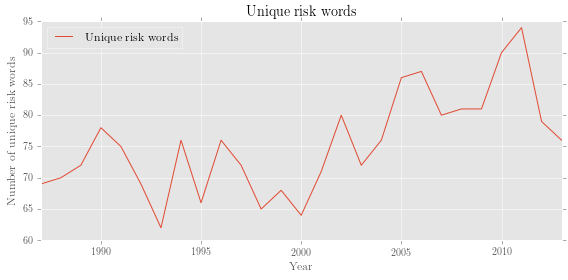

In [53]:
plotter('Unique risk words', u.drop(['1963', '2014']), y_label = 'Number of unique risk words', legend = True,
       num_to_plot = 'all')

So, we can see a generally upward trajectory, with more risk words constantly being used. Many of these results appear once, however, and many are nonwords. *Can you figure out how to remove words that appear only once per year?*

### conc()

`conc()` produces concordances of a subcorpus based on a Tregex query. Its main arguments are:

1. A subcorpus to search *(remember to put it in quotation marks!)*
2. A Tregex query

In [132]:
# here, we use a subcorpus of politics articles,
# rather than the total annual editions.
adj_lines = conc('data/nyt/topics/politics/1999', r'/JJ.?/ << /(?i).?\brisk.?\b/') # adj containing a risk word


23:51:14: Getting concordances for data/nyt/topics/politics/1999 ... 
          Query: /JJ.?/ << /(?i).?\brisk.?\b/

0          , Mr. Wahid seems to be playing a       risky   game of free-rein leadership            
1     after making disastrous investments in       risky   securities , has a lower rating among   
2                         That was the least       risky   course but one that left the initiative 
3     A party-line vote on witnesses is more       risky   politically for Republicans than        
4     decision to fire General Musharraf was       risky   ; in Pakistan , generals have ruled for 
5                                   It was a       risky   strategy , but Mr. Lee apparently       
6                 As Indonesia undergoes its       risky   on-the-job training in democracy in the 
7     -- said creative legal arguments and a       risky   strategy of challenging some facts in   
8   electoral setbacks produced increasingly       risky   financial decisions by 

You can set `conc()` to print only the first ten examples with `n = 10`, or ten random these with the `n = 15, random = True` parameter.

In [99]:
lines = conc('data/nyt/years/2007', r'/VB.?/ < /(?i).?\brisk.?\b/', n = 15, random = True)


19:23:10: Getting concordances for data/nyt/years/2007 ... 
          Query: /VB.?/ < /(?i).?\brisk.?\b/

0     'll have to fight them alone and then    risk   having to live under the thumb of Iran  
1       's branch system was meant to shift    risk   away from the company to the federal    
2      beat four spades and did not want to    risk   taking a phantom sacrifice -- going down
3     rates and sweeten the repayment -- or    risk   having to withdraw the offerings        
4    and helplessness : residents refuse to    risk   their lives by helping a police force   
5   automakers get back on stable ground or    risk   further cutbacks at General Motors , the
6         When rooms are n't ready , hotels    risk   their reputations and make guests feel  
7        could be as they caved rather than    risk   drawing demagogic fire from the gun     
8          legitimacy even in cases when it   risks   the possibility of losing the prize     
9    Bank of Richmond , said in a spee

`conc()` takes another argument, window, which alters the amount of co-text appearing either side of the match. The default is 50 characters

In [100]:
lines = conc('data/nyt/topics/health/2013', r'/VB.?/ << /(?i).?\brisk.?\b/', n = 15, random = True, window = 20)


19:23:57: Getting concordances for data/nyt/topics/health/2013 ... 
          Query: /VB.?/ << /(?i).?\brisk.?\b/

0       like yours would            risk   damaging its        
1     should not have to            risk   their health        
2         , they can not            risk   having their        
3    care law intact and            risk   a conservative      
4       back years after   risk-reducing   surgery with uterine
5    prolonged pain , to            risk   grave injury and    
6    HealthCare.gov that            risk   the private         
7   what they want , you            risk   reigniting the      
8      warning that they            risk   scrambling hormones 
9         the rights and            risk   the well-being of   
10       what they do or            risk   having cost controls
11  they were willing to            risk   a shutdown over it  
12   legislators , would            risk   being thwarted yet  
13             This case           risks   doing so 

`conc()` also allows you to view parse trees. By default, it's false:

In [107]:
lines = conc('data/nyt/years/2013', r'/VB.?/ < /(?i)\btrad.?/', trees = True)


19:25:39: Getting concordances for data/nyt/years/2013 ... 
          Query: /VB.?/ < /(?i)\btrad.?/

0   ) (PP (IN as) (S (ADVP (RB simply)) (VP   (VBG trading)   (NP (NP (CD one) (NN risk)) (PP (IN for
1   curities)) (SBAR (S (NP (PRP they)) (VP     (VBP trade)   (CC and) (VBP hold))))))))))))) (. .)))
2   S (NP (PRP they)) (VP (VBD started) (NP   (VBG trading)   (NNS options))))))) (. .)))            
3   S (NP (DT a) (JJ German) (NN bank)) (VP    (VBN traded)   (PP (IN in) (NP (NP (NNP New) (NNP York
4   P (WDT which))) (S (NP (NNS banks)) (VP     (VBP trade)   (PP (IN for) (NP (PRP$ their) (JJ own) 
5   NP (NP (DT some) (NNS derivatives)) (VP   (VBG trading)   (PP (IN into) (NP (NP (JJ separate) (NN
6   (S (S (NP (PRP You)) (VP (MD might) (VP      (VB trade)   (NP (DT a) (JJ small)) (PP (CC plus) (P
7   were) (VP (ADVP (RBR more) (RB easily))    (VBN traded)   (PP (IN on) (NP (DT the) (JJ public) (N
8   ) (, ,) (VP (VBP say)))))) (, ,) (S (VP   (VBG trading)   (NP (NNS securities

Just like our other data, conc lines can be edited with `editor()`, or outputted as CSV.

In [108]:
lines = editor(lines, skip_entries = [1, 2, 4, 5])
print lines


***Processing results***

   l                                         m              r                                        
0   ) (PP (IN as) (S (ADVP (RB simply)) (VP   (VBG trading)   (NP (NP (CD one) (NN risk)) (PP (IN for
1   S (NP (DT a) (JJ German) (NN bank)) (VP    (VBN traded)   (PP (IN in) (NP (NP (NNP New) (NNP York
2   (S (S (NP (PRP You)) (VP (MD might) (VP      (VB trade)   (NP (DT a) (JJ small)) (PP (CC plus) (P
3   were) (VP (ADVP (RBR more) (RB easily))    (VBN traded)   (PP (IN on) (NP (DT the) (JJ public) (N
4   ) (, ,) (VP (VBP say)))))) (, ,) (S (VP   (VBG trading)   (NP (NNS securities)))) (, ,) (S (VP (T
..                                       ...            ...                                       ...
31   in) (NP (DT a) (NNS derivatives))) (VP   (VBG trading)   (NP (NN debacle)) (PP (IN in) (NP (NNP 
32  )) (VP (VBZ is) (ADVP (RB already)) (VP   (VBG trading)   (PP (IN at) (NP (JJ low) (NNS yields)))
33  s)) (NN willingness) (S (VP (TO to) (VP      (VB tr

If the concordance lines aren't print well, you can use `concprinter()`:

In [109]:
from corpkit import concprinter
concprinter(lines)


0   ) (PP (IN as) (S (ADVP (RB simply)) (VP   (VBG trading)   (NP (NP (CD one) (NN risk)) (PP (IN for
1   S (NP (DT a) (JJ German) (NN bank)) (VP    (VBN traded)   (PP (IN in) (NP (NP (NNP New) (NNP York
2   (S (S (NP (PRP You)) (VP (MD might) (VP      (VB trade)   (NP (DT a) (JJ small)) (PP (CC plus) (P
3   were) (VP (ADVP (RBR more) (RB easily))    (VBN traded)   (PP (IN on) (NP (DT the) (JJ public) (N
4   ) (, ,) (VP (VBP say)))))) (, ,) (S (VP   (VBG trading)   (NP (NNS securities)))) (, ,) (S (VP (T
5        (ROOT (S (NP (NNS Stocks)) (VP (VP    (VBD traded)   (ADJP (RB steadily) (JJR higher)) (PP (
6   )) (SBAR (IN as) (S (NP (PRP they)) (VP    (VBD traded)   (ADJP (JJR higher))))))))))) (, ,) (NP 
7   NP (JJR more) (NNS derivatives)) (S (VP   (VBG trading)   (PRT (IN out)) (PP (IN of) (NP (DT the)
8   NP (PRP We)) (VP (MD will) (RB not) (VP      (VB trade)   (NP (NNP Dwight) (NNP Howard)))) (. .) 
9   shares)) (S (VP (TO to) (VP (VB be) (VP    (VBN traded)   (ADVP (RB here)))))

Or, you can just use Pandas syntax:

In [110]:
# Because there may be commas in the concordance lines, 
# it's better to generate a tab-separated CSV:
print lines.to_csv(sep = '\t')

	l	m	r
0	) (PP (IN as) (S (ADVP (RB simply)) (VP 	(VBG trading)	 (NP (NP (CD one) (NN risk)) (PP (IN for
1	S (NP (DT a) (JJ German) (NN bank)) (VP 	(VBN traded)	 (PP (IN in) (NP (NP (NNP New) (NNP York
2	(S (S (NP (PRP You)) (VP (MD might) (VP 	(VB trade)	 (NP (DT a) (JJ small)) (PP (CC plus) (P
3	were) (VP (ADVP (RBR more) (RB easily)) 	(VBN traded)	 (PP (IN on) (NP (DT the) (JJ public) (N
4	) (, ,) (VP (VBP say)))))) (, ,) (S (VP 	(VBG trading)	 (NP (NNS securities)))) (, ,) (S (VP (T
5	(ROOT (S (NP (NNS Stocks)) (VP (VP 	(VBD traded)	 (ADJP (RB steadily) (JJR higher)) (PP (
6	)) (SBAR (IN as) (S (NP (PRP they)) (VP 	(VBD traded)	 (ADJP (JJR higher))))))))))) (, ,) (NP 
7	NP (JJR more) (NNS derivatives)) (S (VP 	(VBG trading)	 (PRT (IN out)) (PP (IN of) (NP (DT the)
8	NP (PRP We)) (VP (MD will) (RB not) (VP 	(VB trade)	 (NP (NNP Dwight) (NNP Howard)))) (. .) 
9	shares)) (S (VP (TO to) (VP (VB be) (VP 	(VBN traded)	 (ADVP (RB here)))))))) (, ,) (RB so) (S
10	NN process))) (, ,) (NP (P

You can also print some `TeX`, if you're that way inclined:

In [111]:
print lines.to_latex()

\begin{tabular}{llll}
\toprule
{} & l                                         & m              & r                                         \\
\midrule
0  &  ) (PP (IN as) (S (ADVP (RB simply)) (VP  &  (VBG trading) &   (NP (NP (CD one) (NN risk)) (PP (IN for \\
1  &  S (NP (DT a) (JJ German) (NN bank)) (VP  &   (VBN traded) &   (PP (IN in) (NP (NP (NNP New) (NNP York \\
2  &  (S (S (NP (PRP You)) (VP (MD might) (VP  &     (VB trade) &   (NP (DT a) (JJ small)) (PP (CC plus) (P \\
3  &  were) (VP (ADVP (RBR more) (RB easily))  &   (VBN traded) &   (PP (IN on) (NP (DT the) (JJ public) (N \\
4  &  ) (, ,) (VP (VBP say)))))) (, ,) (S (VP  &  (VBG trading) &   (NP (NNS securities)))) (, ,) (S (VP (T \\
5  &       (ROOT (S (NP (NNS Stocks)) (VP (VP  &   (VBD traded) &   (ADJP (RB steadily) (JJR higher)) (PP ( \\
6  &  )) (SBAR (IN as) (S (NP (PRP they)) (VP  &   (VBD traded) &   (ADJP (JJR higher))))))))))) (, ,) (NP  \\
7  &  NP (JJR more) (NNS derivatives)) (S (VP  &  (VBG trading) &   (PRT

### Keywords and ngrams

`corpkit` has some functions for keywording, ngramming and collocation. Each can take a number of kinds of input data:

1. a path to a subcorpus (of either parse trees or raw text)
2. `conc()` output
3. a string of text

`keywords()` produces both keywords and ngrams. It relies on code from the [Spindle](http://openspires.oucs.ox.ac.uk/spindle/) project.

In [133]:
from corpkit import keywords
keys, ngrams = keywords(adj_lines, dictionary = 'bnc.p')
for key in keys[:10]:
    print key

[0, 'risky', 508.7348199144787]
[1, 'indonesia', 24.915426549820793]
[2, 'gamble', 21.245832356241603]
[3, 'pakistan', 20.047208167974258]
[4, 'wahid', 17.22379545224529]
[5, 'englewood', 17.22379545224529]
[6, 'belgrade', 17.22379545224529]
[7, 'undergoes', 17.22379545224529]
[8, 'milosevic', 17.22379545224529]
[9, 'musharraf', 17.22379545224529]


You can also use `interrogator()` to search for keywords or ngrams. To do this, instead of a Tregex query, pass `'keywords'` or `'ngrams'`. You should also specify a dictionary to use as the reference corpus. If you specify    `dictionary = 'self'`, a dictionary will be made of the entire corpus, saved, and used.

In [ ]:
kwds_bnc = interrogator(annual_trees, 'words', 'keywords', dictionary = 'bnc.p')

In [128]:
kwds = interrogator(annual_trees, 'words', 'keywords', dictionary = 'self', quicksave = 'kwds')

Now, rather than a frequency count, you will be given the keyness of each word.

In [86]:
quickview(kwds.results)

  0: bank (n=9630)
  1: bush (n=5000)
  2: clinton (n=4590)
  3: aid (n=4280)
  4: obama (n=4030)
  5: financial (n=3830)
  6: mortgage (n=3710)
  7: iraq (n=3370)
  8: soviet (n=3310)
  9: vioxx (n=3260)
 10: enron (n=3260)
 11: crisis (n=3230)
 12: amp (n=2980)
 13: loan (n=2500)
 14: merck (n=2370)
 15: risk (n=2280)
 16: euro (n=2110)
 17: drug (n=2030)
 18: debt (n=1990)
 19: yesterday (n=1940)
 20: mccain (n=1910)
 21: security (n=1890)
 22: regulator (n=1840)
 23: subprime (n=1740)
 24: gore (n=1690)


In [65]:
kwds.table

,1963,1987,1988,1989,...,2011,2012,2013,2014
0,soviet,aid,dukakis,soviet,...,bank,romney,jpmorgan,ukraine
1,communist,reagan,aid,saving,...,debt,bank,amp,marijuana
2,treaty,mallet,radon,gorbachev,...,amp,euro,bank,email
3,kennedy,homosexual,soviet,pill,...,crisis,jpmorgan,syria,russia
4,nuclear,soviet,virus,iraq,...,euro,obama,bush,bush
...,...,...,...,...,...,...,...,...,...
45,free,heterosexual,saving,hedge,...,ubs,banking,euro,ackman
46,west,class,license,bonn,...,iodine,mallet,soviet,lab
47,selected,hostage,cocaine,depositor,...,loan,iraqi,futter,data
48,berlin,ship,contra,hungary,...,contagion,country,guideline,concussion


Let's sort these, based on those increasing/decreasing frequency:

In [66]:
inc = editor(kwds.results, sort_by = 'increase')
dec = editor(kwds.results, sort_by = 'decrease')


***Processing results***


***Done!***


***Processing results***


***Done!***



... and have a look:

In [67]:
quickview(inc, 15)

  0: bank (n=9630)
  1: obama (n=4030)
  2: amp (n=2980)
  3: bush (n=5000)
  4: mortgage (n=3710)
  5: vioxx (n=3260)
  6: financial (n=3830)
  7: crisis (n=3230)
  8: yesterday (n=1940)
  9: euro (n=2110)
 10: jpmorgan (n=1390)
 11: debt (n=1990)
 12: tiger (n=1370)
 13: romney (n=1120)
 14: mccain (n=1910)


In [68]:
quickview(dec, 15)

  0: soviet (n=3310)
  1: aid (n=4280)
  2: communist (n=510)
  3: reagan (n=1510)
  4: treaty (n=430)
  5: kennedy (n=350)
  6: clinton (n=4590)
  7: peking (n=230)
  8: exp (n=220)
  9: gorbachev (n=990)
 10: cent (n=270)
 11: khrushchev (n=210)
 12: fare (n=210)
 13: junk (n=1230)
 14: homosexual (n=630)


As expected. Defunct states and former politicans are on the way out, while newer politicans are on the way in. We can do the same with n-grams, of course:

In [7]:
ngms = interrogator(annual_trees, 'words', 'ngrams', quicksave = 'ngms')

 04:08:41: Finished! 53594 unique results, 870715 total.

 04:08:46: Data saved: data/saved_interrogations/ngms.p



Neat. Now, let's make some thematic categories. This time, we'll make a list of tuples, containing regexes to match, and the result names:

In [69]:
regexes = [(r'\b(legislature|medicaid|republican|democrat|federal|council)\b', 'Government organisations'),
(r'\b(empire|merck|commerical)\b', 'Companies'),
(r'\b(athlete|policyholder|patient|yorkers|worker|infant|woman|man|child|children|individual|person)\b', 'People, everyday'),
(r'\b(marrow|blood|lung|ovarian|breast|heart|hormone|testosterone|estrogen|pregnancy|prostate|cardiovascular)\b', 'The body'),
(r'\b(reagan|clinton|obama|koch|slaney|starzl)\b', 'Specific people'),
(r'\b(implant|ect|procedure|abortion|radiation|hormone|vaccine|medication)\b', 'Treatments'),
(r'\b(addiction|medication|drug|statin|vioxx)\b', 'Drugs'),
(r'\b(addiction|coronary|aneurysm|mutation|injury|fracture|cholesterol|obesity|cardiovascular|seizure|suicide)\b', 'Symptoms'),
(r'\b(worker|physician|doctor|midwife|dentist)\b', 'Healthcare professional'),
(r'\b(transmission|infected|hepatitis|virus|hiv|lung|aids|asbestos|malaria|rabies)\b', 'Infectious disease'),
(r'\b(huntington|lung|prostate|breast|heart|obesity)\b', 'Non-infectious disease'), 
(r'\b(policyholder|reinsurance|applicant|capitation|insured|insurer|insurance|uninsured)\b', 'Finance'),
(r'\b(experiment|council|journal|research|university|researcher|clinical)\b', 'Research')]

Now, let's loop through out list and merge keyword and n-gram entries:

In [71]:
# NOTE: you can use `print_info = False` if you don't want all this stuff printed.
for regex, name in regexes:
    kwds = editor(kwds.results, merge_entries = regex, newname = name, print_info = False)
    ngms = editor(ngms.results, merge_entries = regex, newname = name, print_info = False)

# now, remove all other entries
kwds = editor(kwds.results, just_entries = [name for regex, name in regexes])
ngms = editor(ngms.results, '%', ngms.totals, just_entries = [name for regex, name in regexes])


***Processing results***

Keeping 13 entries:
    Government organisations
    Companies
    People, everyday
    The body
    Specific people
    Treatments
    Drugs
    Symptoms
    Healthcare professional
    Infectious disease
... and 3 more ... 


***Done!***


***Processing results***

Keeping 13 entries:
    Government organisations
    Companies
    People, everyday
    The body
    Specific people
    Treatments
    Drugs
    Symptoms
    Healthcare professional
    Infectious disease
... and 3 more ... 


***Done!***



Pretty nifty, eh? Welp, let's plot them:

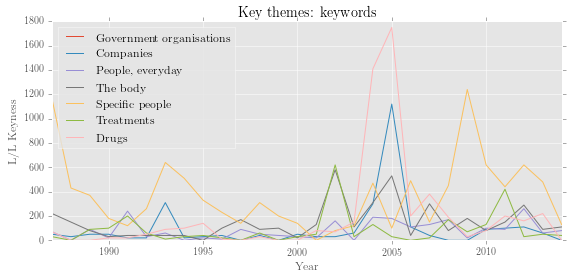

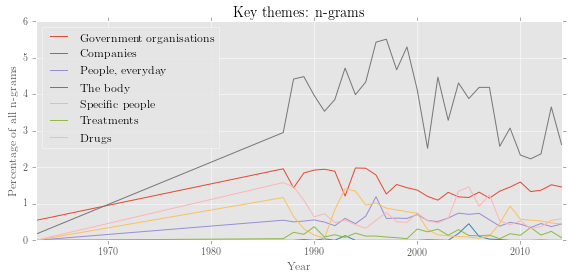

In [72]:
plotter('Key themes: keywords', kwds.results.drop('1963'), y_label = 'L/L Keyness', legend_pos = 'upper left')
plotter('Key themes: n-grams', ngms.results, y_label = 'Percentage of all n-grams')

So, we can now do some pretty cool stuff in just a few lines of code. Let's concordance the top five keywords, looking at the year in which they are most key:

In [782]:
import os
# iterate through results
for index, w in enumerate(list(kwds.results)[:5]):
    # get the year with most occurrences
    top_year = kwds.results[w].idxmax()
    # print some info
    print '\n%d: %s, %s' % (index + 1, w, str(top_year))
    # get path to that subcorpus
    top_dir = os.path.join(annual_trees, str(top_year))
    # make a tregex query with token start and end defined
    query = r'/(?i)^' + w + r'/'
    # do concordancing
    lines = conc(top_dir, query, random = True, n = 10)


1: bank, 2010

22:05:52: Getting concordances for data/nyt/years/2010 ... 
          Query: /(?i)^bank/

0         world , can we demand of European     banks   three times more capital to cover their 
1   have a high risk profile and that other     banks   should beware                           
2    of credit-default swaps on Anglo Irish      Bank   debt and would hold an auction of       
3                                   Federal      bank   regulators have set an April 24 deadline
4  banks from moving their most risk-hungry   bankers   and operations to the least-regulated   
5    Deposit Insurance Corporation shut the      bank   down                                    
6    is low , and some Citigroup investment   bankers   and traders are threatening to leave for
7        threats to `` fight '' unspecified   bankers   some indeterminate day                  
8    an April 24 deadline by which Broadway      Bank   -- his family business turned political 
9                    

### Collocates

You can easily generate collocates for corpora, subcorpora or concordance lines:

In [135]:
from corpkit import collocates
conc_colls = collocates(adj_lines)
for coll in conc_colls:
    print coll

subc_colls = collocates('data/nyt/years/2003')
for coll in subc_colls:
    if 'risk' not in coll:
        print coll

[0, u'blood', u'pressure']
[1, u'breast', u'cancer']
[2, u'bush', u'administration']
[4, u'heart', u'disease']
[9, u'last', u'week']
[10, u'last', u'year']
[11, u'new', u'york']
[12, u'officials', u'said']
[14, u'president', u'bush']
[24, u'said', u'would']
[26, u'take', u'risks']
[27, u'united', u'states']
[29, u'years', u'ago']


With the `collocates()` function, you can specify the maximum distance at which two tokens will be considered collocates.

In [136]:
colls = collocates(adj_lines, window = 3)
for coll in colls:
    print coll

[0, u'less', u'risky']
[1, u'risky', u'plan']
[2, u'risky', u'strategy']


### quicktree() and searchtree()

The two functions are useful for visualising and searching individual syntax trees. They have proven useful as a way to practice your Tregex queries.

You could get trees by using `conc()` with a very large window and *trees* set to *True*. Alternatively, you can open files in the data directory directly, and paste them in.

`quicktree()` generates a visual representation of a parse tree. Here's one from 1989:

In [138]:
tree = '(ROOT (S (NP (NN Pre-conviction) (NN attachment)) (VP (VBZ carries) (PP (IN with) (NP (PRP it))) (NP (NP (DT the) (JJ obvious) (NN risk)) (PP (IN of) (S (VP (VBG imposing) (NP (JJ drastic) (NN punishment)) (PP (IN before) (NP (NN conviction)))))))) (. .)))'
# currently broken!
# quicktree(tree)

`searchtree()` requires a tree and a Tregex query. It will return a list of query matches.

In [139]:
from corpkit import searchtree
print searchtree(tree, r'/VB.?/ >># (VP $ NP)')
print searchtree(tree, r'NP')

['carries']
['Pre-conviction attachment', 'it', 'the obvious risk of imposing drastic punishment before conviction', 'the obvious risk', 'drastic punishment', 'conviction']


Now you're familiar with the corpus and functions. In the sections below, we'll perform a formal, followed by a functional, analysis of risk. Let's start with the formal side of things:

### Word classes of risk words in the NYT

In formal grammar, as we saw earlier, risk words can be nouns, verbs, adjectives and adverbs. Though we've seen that there are a lot of nouns, and that nouns are becoming more frequent, we don't yet know whether or not nouns are becoming more frequent in the NYT generally. To test this, we can do as follows:

In [87]:
# 'any' is a special query, which finds any tag if 'pos'
# and any word if 'words'.
baseline = interrogator(annual_trees, 'pos', 'any', lemmatise = True, quicksave = 'baseline')
risk_pos = interrogator(annual_trees, 'pos', r'__ < /(?i).?\brisk.?/', lemmatise = True, quicksave = 'riskpos')

 09:38:19: Finished! 6 unique results, 376266 total.

 09:38:19: Data saved: data/saved_interrogations/riskpos.p



In the cell above, the `lemmatise = True` option will convert tags like `'NNS'` to `'Noun'`.

In [88]:
quickview(baseline.results, n = 10)

  0: Noun (n=6164445)
  1: Verb (n=3299115)
  2: Preposition (n=2521695)
  3: Determiner (n=2047470)
  4: Adjective (n=1716147)
  5: Adverb (n=884301)
  6: Pronoun (n=833389)
  7: Coordinating conjunction (n=663931)
  8: to (n=543740)
  9: Cardinal number (n=317706)


In [89]:
quickview(risk_pos.results)

  0: Noun (n=289209)
  1: Adjective (n=45604)
  2: Verb (n=41395)
  3: Adverb (n=49)
  4: Cardinal number (n=5)
  5: x (n=4)


Now, we can calculate the percentage of the time that a noun is a risk noun (and so on).

In [90]:
open_words = ['Noun', 'Verb', 'Adjective', 'Adverb']
maths_done = editor(risk_pos.results, '%', baseline.results, sort_by = 'total', just_entries = open_words, skip_subcorpora = [1963])


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 4 entries:
    Noun
    Verb
    Adjective
    Adverb


***Done!***



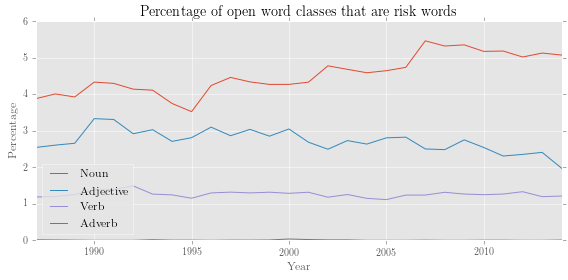

In [92]:
plotter('Percentage of open word classes that are risk words', maths_done.results, 
        y_label = 'Percentage', legend_pos = 'lower left')

Neat, huh? We can see that nominalisation of risk is a very real thing.

Our problem, however, is that formal categories like noun and verb only take us so far: in the phrase "risk metrics", risk is a noun, but performs a modifier function, for example. In the next section, we interrogate the corpus for *functional*, rather than *formal* categorisations of risk words.

Before we start our corpus interrogation, we'll also present a *very* brief explanation of *Systemic Functional Linguistics*&mdash;the theory of language that underlies our analytical approach.

### Functional linguistics

*Functional linguistics* is a research area concerned with how *realised language* (lexis and grammar) work to achieve meaningful social functions. One functional linguistic theory is *Systemic Functional Linguistics*, developed by Michael Halliday.

In [145]:
from IPython.display import HTML
HTML('<iframe src=http://en.mobile.wikipedia.org/wiki/Michael_Halliday?useformat=mobile width=700 height=350></iframe>')

Central to the theory is a division between **experiential meanings** and **interpersonal meanings**.

* Experiential meanings communicate what happened to whom, under what circumstances.
* Interpersonal meanings negotiate identities and role relationships between speakers 

Halliday argues that these two kinds of meaning are realised **simultaneously** through different parts of English grammar.

* Experiential meanings are made through **transitivity choices**.
* Interpersonal meanings are made through **mood choices**

Here's one visualisation of it. We're concerned with the two left-hand columns. Each level is an abstraction of the one below it.

<br>
<img style="float:left" src="https://raw.githubusercontent.com/interrogator/risk/master/images/egginsfixed.jpg" alt="SFL metafunctions"  height="500" width="800" />
<br>

Transitivity choices include fitting together configurations of:

* Participants (*a man, green bikes*)
* Processes (*sleep, has always been, is considering*)
* Circumstances (*on the weekend*, *in Australia*)

Mood features of a language include:

* Mood types (*declarative, interrogative, imperative*)
* Modality (*would, can, might*)
* Lexical density&mdash;the number of words per clause, the number of content to non-content words, etc.

Lexical density is usually a good indicator of the general tone of texts. The language of academia, for example, often has a huge number of nouns to verbs. We can approximate an academic tone simply by making nominally dense clauses: 

      The consideration of interest is the potential for a participant of a certain demographic to be in Group A or Group B.

Notice how not only are there many nouns (*consideration*, *interest*, *potential*, etc.), but that the verbs are very simple (*is*, *to be*).

In comparison, informal speech is characterised by smaller clauses, and thus more verbs.

      A: Did you feel like dropping by?
      B: I thought I did, but now I don't think I want to

Here, we have only a few, simple nouns (*you*, *I*), with more expressive verbs (*feel*, *dropping by*, *think*, *want*)

> **Note**: SFL argues that through *grammatical metaphor*, one linguistic feature can stand in for another. *Would you please shut the door?* is an interrogative, but it functions as a command. *invitation* is a nominalisation of a process, *invite*. We don't have time to deal with these kinds of realisations, unfortunately.

### Functional roles of *risk* in the NYT

> *A discourse analysis that is not based on grammar is not an analysis at all, but simply a running commentary on a text.* - [M.A.K. Halliday, 1994]()

Our analysis proceeded according to the description of the transitivity system in *systemic functional grammar* ([SFG: see Halliday & Matthiessen, 2004](#ref:hallmat)).

The main elements of the transitivity system are *participants* (the arguments of main verbs) and *processes* (the verbal group). Broadly speaking, processes can be modified by circumstances (adverbs and prepositional phrases, and participants can be modified through epithets, classifiers (determiners, adjectives, etc).

> This is an oversimplification, of course. Grab a copy of the [*Introduction to Functional Grammar*](http://www.tandfebooks.com/isbn/9780203783771) to find out more.

Risk words can potentially be participants, processes or modifiers.

*Risk-as-participant*: any nominal argument of a process that is headed by a risk word. *Examples*:

* *the big risk*
* *considerable risk*
* *the risk of cancer*
* *risk-management*

*Risk-as-process*: risk word as the rightmost component of a VP. **Examples**:

* *he risked his life*
* *the company could potentially risk it*

*Risk-as-modifier*: any risk word that modifies a participant or process. This includes many adjectival risk words and many risk words appearing within prepositional or adverbial phrases. **Examples**:

* *the chance of risk*
* *risky business*
* *they riskily arranged to meet*

To find the distributions of these, we define three (very long and complicated) Tregex queries as sublists of titles and patterns under *query*. We then use `multiquery()` to search for each query in turn.

In [4]:
from corpkit import multiquery
query = (['Participant', r'/(?i).?\brisk.?/ > (/NN.?/ >># (NP !> PP !> (VP <<# (/VB.?/ < '
        '/(?i)\b(take|takes|taking|took|taken|run|runs|running|ran|pose|poses|posed|posing)\b/)))) | >># (ADJP > VP)'], 
    ['Process', r'VP !> VP << (/VB.?/ < /(?i).?\brisk.?/) | > VP <+(VP) (/VB.?/ < '
        '/(?i)(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts|pose|poses|posed|posing)/'
        '>># (VP < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'], 
    ['Modifier', r'/(?i).?\brisk.?/ !> (/NN.?/ >># (NP !> PP !> (VP <<# (/VB.?/ < '
        '/(?i)\b(take|takes|taking|took|taken|run|runs|running|ran|pose|poses|posed|posing)\b/)))) & !>># '
        '(ADJP > VP) & !> (/VB.?/ >># VP) & !> (/NN.?/ >># (NP > (VP <<# (/VB.?/ < /(?i)\b('
            'take|takes|taking|took|taken|run|runs|running|ran|pose|poses|posed|posing)\b/))))'])
functional_role = multiquery(annual_trees, query, quicksave = 'functional_role')

 
 10:25:36: Data saved: data/saved_interrogations/functional_role.p



In [5]:
ppm = editor(functional_role.results, '%', allwords.totals)


***Processing results***


***Done!***



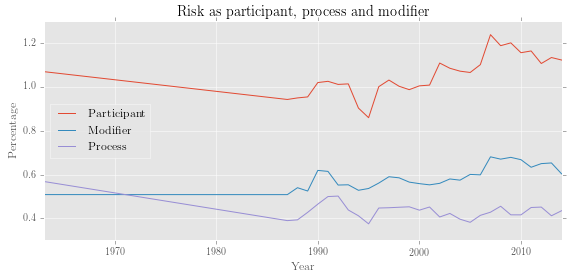

In [6]:
plotter('Risk as participant, process and modifier', ppm.results)

Here we can see that modifier forms are become more frequent over time, and have overtaken risk processes. Later, we determine which modifier forms in particular are becoming more common.

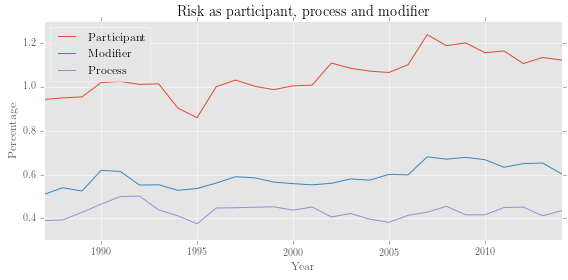

In [7]:
# Perhaps you want to see the result without 1963?
plotter('Risk as participant, process and modifier', ppm.results.drop('1963'))

### Risk as participant

> *You shall know a word by the company it keeps.* - [J.R. Firth, 1957](#ref:firth)

Functionally, *risk* is most commonly a participant in the NYT. This gives us a lot of potential areas of interest. We'll go through a few here, but there are plenty of other things that we have to leave out for reasons of space.

### Process types for participant risk

Here, we need to import verbose regular expressions that match any relational, verbal or mental process.

In [8]:
from dictionaries.process_types import processes
print processes.relational
print processes.verbal

(?i)\b((sound{0,2}|look{0,2}|seem{0,2}|appear{0,2})(s|es|ed|ing|)|(become|becomes|became|become|becoming|appear|appears|feel|feels|felt|feeling|smell|smells|smelled|smelt|smelling|be|was|been|being|are|were|is|am|[^a-z]s|[^a-z]m|[^a-z]re|have|has|had|had|having|[^a-z]d|[^a-z]ve))\b
(?i)\b((accede{0,2}|add{0,2}|admit{0,2}|advise{0,2}|advocate{0,2}|allege{0,2}|announce{0,2}|answer{0,2}|apprise{0,2}|argue{0,2}|ask{0,2}|assert{0,2}|assure{0,2}|attest{0,2}|aver{0,2}|avow{0,2}|bark{0,2}|beg{0,2}|bellow{0,2}|blubber{0,2}|boast{0,2}|brag{0,2}|cable{0,2}|claim{0,2}|comment{0,2}|complain{0,2}|confess{0,2}|confide{0,2}|confirm{0,2}|contend{0,2}|convey{0,2}|counsel{0,2}|declare{0,2}|demand{0,2}|disclaim{0,2}|disclose{0,2}|divulge{0,2}|emphasise{0,2}|emphasize{0,2}|exclaim{0,2}|explain{0,2}|forecast{0,2}|gesture{0,2}|grizzle{0,2}|guarantee{0,2}|hint{0,2}|holler{0,2}|indicate{0,2}|inform{0,2}|insist{0,2}|intimate{0,2}|mention{0,2}|moan{0,2}|mumble{0,2}|murmur{0,2}|mutter{0,2}|note{0,2}|object{0,2}|o

We can use these in our Tregex queries to look for the kinds of processes participant risks are involved in. First, let's get a count for all processes with risk participants:

In [9]:
# get total number of processes with risk participant
query = r'/VB.?/ ># (VP ( < (NP <<# /(?i).?\brisk.?/) | >+(/.P$/) (VP $ (NP <<# /(?i).?\brisk.?/))))'
proc_w_risk_part = interrogator(annual_trees, 'count', query, quicksave = 'proc_w_risk_part')

 
 10:35:23: Data saved: data/saved_interrogations/proc_w_risk_part.p



### Relational processes with risk participant

In [10]:
# subj_query = r'/VB.?/ < %s ># (VP >+(/.P$/) (VP $ (NP <<# /(?i).?\brisk.?/)))' % processes.relational
# obj_query = r'/VB.?/ < %s ># (VP < (NP <<# /(?i).?\brisk.?/))'  % processes.relational
query = r'/VB.?/ < /%s/ ># (VP ( < (NP <<# /(?i).?\brisk.?/) | >+(/.P$/) (VP $ (NP <<# /(?i).?\brisk.?/))))' % processes.relational
relationals = interrogator(annual_trees, 'words', query, lemmatise = True, quicksave = 'relationals')

 10:45:21: Finished! 9 unique results, 23937 total.

 10:45:21: Data saved: data/saved_interrogations/relationals.p



In [11]:
rels = editor(relationals.results, '%', proc_w_risk_part.totals)


***Processing results***


***Done!***



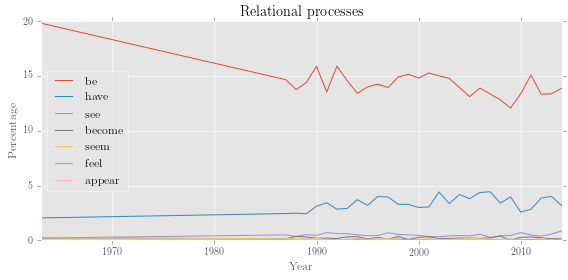

In [12]:
plotter('Relational processes', rels.results)

### Adjectives modifying risk

First, we can look at adjectives that modify a participant risk.

In [14]:
query = r'/JJ.?/ > (NP <<# /(?i).?\brisk.?/)'
adj_modifiers = interrogator(annual_trees, 'words', query, lemmatise = True, quicksave = 'adj_modifiers')

 08:02:40: Finished! 1856 unique results, 67571 total.

 08:02:40: Data saved: data/saved_interrogations/adj_modifiers.p




***Processing results***


***Done!***



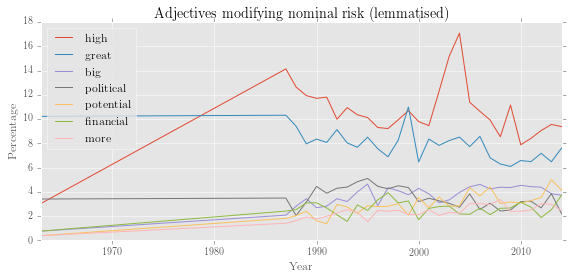

In [13]:
adj_modifiers = load_result('adj_modifiers')
adj = editor(adj_modifiers.results, '%', adj_modifiers.totals)
plotter('Adjectives modifying nominal risk (lemmatised)', adj.results, num_to_plot = 7)

Yuck! That doesn't tell us much. Let's try visualising the data in a few different ways. First, let's see what the top results look like...

In [14]:
quickview(adj_modifiers.results)

  0: high (n=7278)
  1: great (n=5143)
  2: big (n=2637)
  3: political (n=2226)
  4: potential (n=2177)
  5: financial (n=1774)
  6: more (n=1674)
  7: low (n=1636)
  8: significant (n=1588)
  9: serious (n=1422)
 10: real (n=1354)
 11: little (n=1125)
 12: own (n=1095)
 13: less (n=855)
 14: substantial (n=811)
 15: systemic (n=808)
 16: such (n=754)
 17: possible (n=693)
 18: considerable (n=673)
 19: other (n=669)
 20: calculated (n=668)
 21: huge (n=624)
 22: excessive (n=611)
 23: environmental (n=590)
 24: risky (n=560)


OK, here are some ideas:


***Processing results***

Skipping 1760 entries:
    great
    political
    potential
    financial
    significant
    serious
    little
    substantial
    systemic
    possible
... and 1750 more ... 


***Done!***


***Processing results***

Keeping 827 entries:
    significant
    substantial
    considerable
    calculated
    environmental
    additional
    cardiovascular
    unnecessary
    particular
    risk-taking
... and 817 more ... 


***Done!***


***Processing results***

Keeping 4 entries:
    more
    high
    calculated
    potential


***Done!***



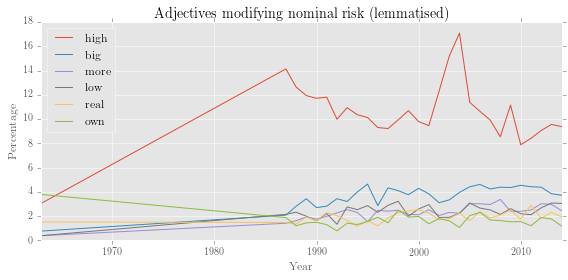

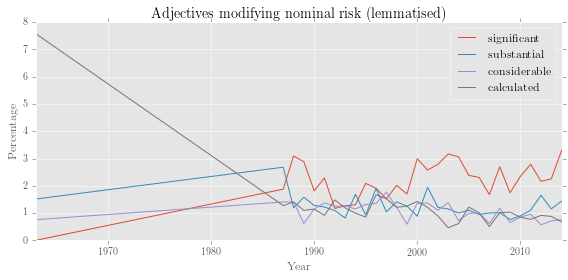

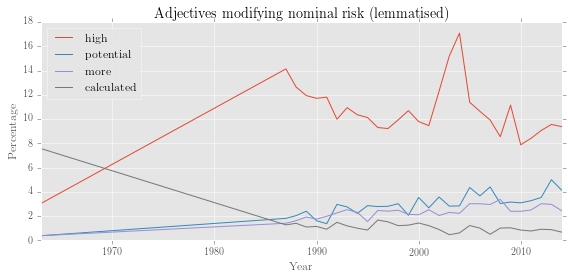

In [15]:
# remove words with five or more letters
small_adjs = editor(adj_modifiers.results, '%', adj_modifiers.totals, skip_entries = r'.{5,}')

plotter('Adjectives modifying nominal risk (lemmatised)', small_adjs.results, num_to_plot = 6)

#get results with seven or more letters
big_adjs = editor(adj_modifiers.results, '%', adj_modifiers.totals, just_entries = '.{10,}')
plotter('Adjectives modifying nominal risk (lemmatised)', big_adjs.results, num_to_plot = 4)

#get a few interesting points
lst = ['more', 'high', 'calculated', 'potential']
select_adjs = editor(adj_modifiers.results, '%', adj_modifiers.totals, just_entries = lst)
plotter('Adjectives modifying nominal risk (lemmatised)', select_adjs.results, 
    num_to_plot = 4)

Wow! What's happening with *calculated risk* in 1963? Let's modify the original Tregex query a little and use `conc()` to find out.

In [171]:
### old query: r'/JJ.?/ > (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))'
calculated_risk = r'/JJ.?/ < /(?i)calculated/> (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))'
# remove '( > VP | $ VP)' from the line above to get more instances
lines = conc('data/nyt/years/1963', calculated_risk)


08:26:59: Getting concordances for data/nyt/years/1963 ... 
          Query: /JJ.?/ < /(?i)calculated/> (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))

0   , in Cuba , Chairman Khrushchev took a   calculated   risk by installing long-range missiles  
1                      Kennedy has taken a   calculated   risk here                               
2         , the foreman last year , took a   calculated   risk and rebuilt the pitching staff with
3     a study in depth had been made was a   calculated   risk                                    
4                                This is a   calculated   risk , but in the light of recent       
5                  U A.M. , `` Prayer Is a   Calculated   Risk                                    
6     Unite '' States is still surrounding   Calculated   Risk some basic forms of economic       
7                            London took a   calculated   risk in gambling everything on success  
8                                 It was a   calculated   ris

### Risk of ... ?

Next, we'll look at risk of (noun) constructions, as in:

In [17]:
riskofsomething = r'/NN.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'
lines = conc('data/nyt/years/1988', riskofsomething, n = 25, random = True)


11:16:24: Getting concordances for data/nyt/years/1988 ... 
          Query: /NN.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))

0       and curettage , carry risks of blood          loss   , perforation of the uterus             
1    at many hospitals point to the risks of     infection   posed by crowding the sick together     
2         can not be corrected , the risk of          loss   to the department is so high that       
3     generalize about the relative risks of          food   , except in one case : '' Any food of   
4                                The risk of     hepatitis   is higher , he said , because the virus 
5          about possible long-term risks of     tretinoin   used indefinitely                       
6     industry - the risk of severe economic         jolts   continues to mount                      
7        wo n't return home with the risk of         chaos   after a Soviet withdrawal               
8   supply is seriously threat

Notice that singular and plural forms may be in the results: both *substance* and *substances* are returned, and would be counted as unique items.

If we want to ignore the difference between singular and plural (or different inflections of a verb), we need to use a *lemmatiser*. Luckily, `interrogator()` has one built in.

When lemmatisation is necessary, we can pass a `lemmatise = True` parameter to `interrogator()`.

Lemmatisation requires knowing the part of speech of the input. `interrogator()` determines this by looking at the first part of the Tregex query: if it's `/JJ.?/`, the lemmatiser will be told that the word is an adjective. If the part of speech cannot be located, noun is used as a default. You can also manually pass a tag to the lemmatiser with a `lemmatag = 'n/v/r/a'` option.

In [18]:
# Risk of (noun)
risk_of = interrogator(annual_trees, 'words', riskofsomething, lemmatise = True, quicksave = 'risk_of')

 12:26:07: Finished! 3302 unique results, 50062 total.

 12:26:08: Data saved: data/saved_interrogations/risk_of.p



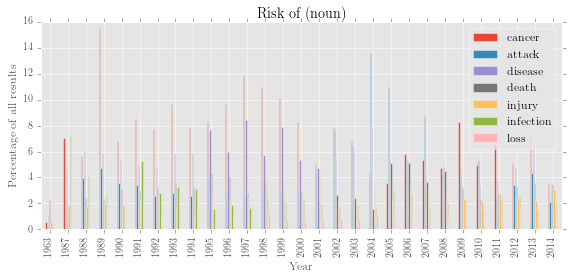

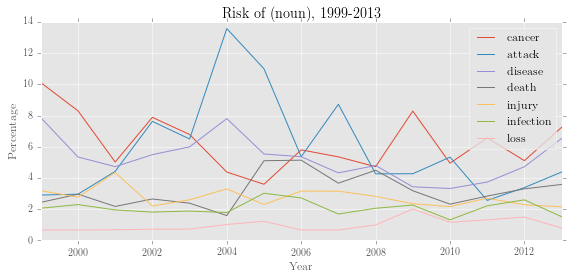

In [20]:
rel_riskof = editor(risk_of.results, '%', risk_of.totals, print_info = False)
plotter('Risk of (noun)', rel_riskof.results, y_label = 'Percentage of all results', 
        legend_pos = 'upper right', kind = 'bar')
plotter('Risk of (noun), 1999-2013', editor(rel_riskof.results, span_subcorpora = [1999,2013], print_info = False).results)

### A cautionary tale ...

At one point in our investigation, we looked specifically for military risks. From these results, we saw that *risk of attack* and *risk of war* were common. So, we plotted them:

In [21]:
quickview(risk_of, n = 20)

  0: cancer (n=3354)
  1: attack (n=2699)
  2: disease (n=2665)
  3: death (n=1604)
  4: injury (n=1294)
  5: infection (n=1170)
  6: loss (n=591)
  7: failure (n=588)
  8: problem (n=576)
  9: default (n=558)
 10: inflation (n=528)
 11: war (n=512)
 12: stroke (n=489)
 13: complication (n=460)
 14: damage (n=385)
 15: harm (n=376)
 16: transmission (n=330)
 17: diabetes (n=320)
 18: recession (n=318)
 19: suicide (n=317)



***Processing results***

Keeping 2 entries:
    attack
    war


***Done!***



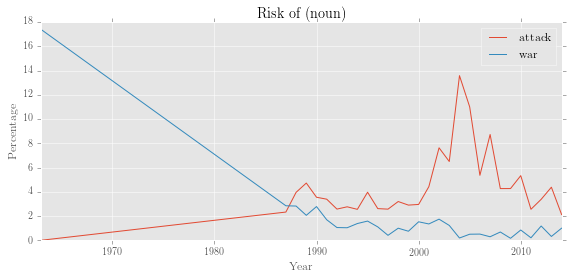

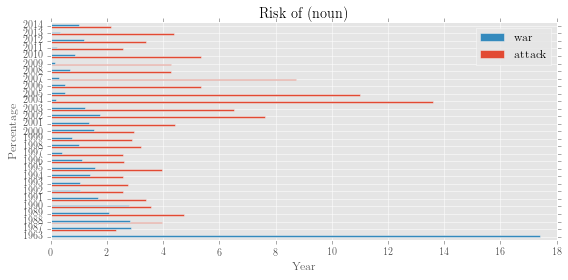

In [22]:
military = editor(risk_of.results, '%', risk_of.totals, just_entries = ['attack', 'war'])
plotter('Risk of (noun)', military.results)
# barh, just for fun
plotter('Risk of (noun)', military.results, kind = 'barh')

 We thought it was interesting how *risk of attack* rose in frequency shortly after 9/11. So, we decided to look more closely at *risk of attack*:

In [177]:
attackrisk = r'/NN.?/ < /(?i)attack.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'
lines = conc('data/nyt/years/2004', attackrisk, n = 15, random = True) 


08:38:29: Getting concordances for data/nyt/years/2004 ... 
          Query: /NN.?/ < /(?i)attack.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))

0       The group says the risk of terrorist   attacks   justifies more spending , and it is busy
1    angina can reduce their risk of a heart    attack   with a variety of medications           
2     Re '' U.S. Warns of High Risk of Qaeda    Attack   '' -LRB- front page , Aug. 2 -RRB       
3       also bringing down the risk of heart    attack   , progressive heart failure and other   
4         , may increase the risk of a heart    attack   or stroke in heart bypass surgery       
5     Vioxx might increase the risk of heart   attacks   first emerged three years ago , in a    
6       the drug increased the risk of heart   attacks   and strokes in some patients            
7         , might increase the risk of heart    attack   or stroke in coronary artery bypass     
8    that Vioxx increased the risks of heart 

Whoops. We were wrong. Almost all occurrences actually referred to *heart attack*!

In [23]:
query = r'/NN.?/ < /(?i)\b(heart|terror).?/ $ (/NN.?/ < /(?i)\battack.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /().?\brisk.?/)))))' 
terror_heart = interrogator(annual_trees, 'words', query, lemmatise = True, quicksave = 'terror_heart')

 13:05:26: Finished! 2 unique results, 1949 total.

 13:05:26: Data saved: data/saved_interrogations/terror_heart.p



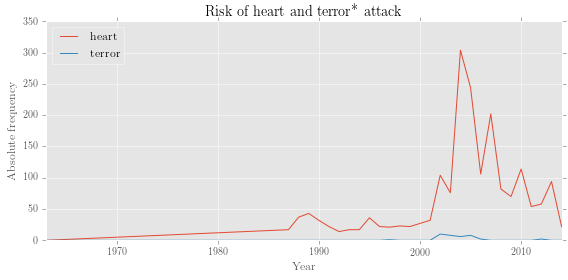

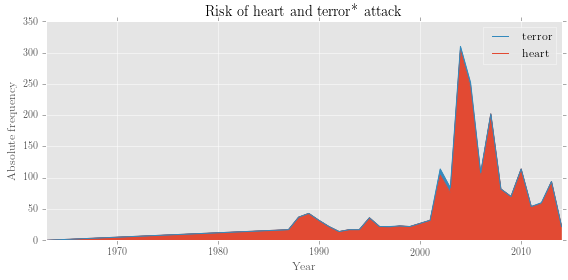

In [24]:
plotter('Risk of heart and terror* attack', terror_heart.results, num_to_plot = 2, legend_pos = 'upper left')
plotter('Risk of heart and terror* attack', terror_heart.results, num_to_plot = 2, kind = 'area', stacked = True)

So, we were a long way off-base. This is an ever-present danger in corpus linguistics. The decontextualisation needed to investigate the lexicogrammar of texts makes it easy to misunderstand (or worse, misrepresent) the data. Though concordancing is one of the oldest tasks in the corpus linguistic playbook, it remains a fundamental one, especially in discourse-analytic investigations.

> ... *why did heart attacks become a big deal in 2004, you ask? Stay tuned ...*

### Processes in which risk is subject/object

Here, we look at the kinds of predicators that occur when risk subject or object. Note that we remove *run/take/pose risk*, as these are actually verbal risks (see below).

By navigating parse trees in more complex ways, we can learn the kinds of processes risk as a participant is involved in.

In [25]:
query = (r'/VB.?/ !< /(?i)(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts|pose|poses|posing|posed)/' \
    r' > (VP ( < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))) | >+(VP) (VP $ (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))')
predicators = interrogator(annual_trees, 'words', query, lemmatise = True, quicksave = 'predicators')

 13:16:10: Finished! 1491 unique results, 99218 total.

 13:16:10: Data saved: data/saved_interrogations/predicators.p




***Processing results***


***Done!***


***Processing results***

Skipping 1 entries:
    be


***Done!***



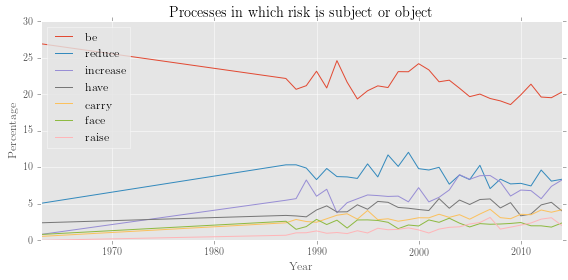

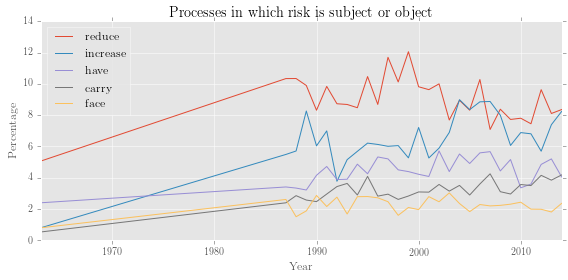

In [26]:
# Processes in which risk is subject/object
plotter('Processes in which risk is subject or object', editor(predicators.results, '%', predicators.totals).results, num_to_plot = 7)
# skip be:
plotter('Processes in which risk is subject or object', editor(predicators.results, 
'%', predicators.totals, skip_entries = ['be']).results, num_to_plot = 5)

Interesting! 

### Risk as process

When *risk* is the main verb in a clause (e.g. *don't risk it*), it is the process. There are other kinds of risk processes, however: when risk occurs as the first object argument of certain nouns, it may be classified as a *process-range configuration* (an SFL term). Searching the data reveals four other main kinds of risk process:

1. *to take risk*
2. *to run risk*
3. *to put at risk*
4. *to pose a risk*

In these cases, the expression is more or less idiomatic, and the main verb carries little semantic weight ([Eggins, 2004](#ref:eggins)). 

We tracked the relative frequency of each construction over time.

In [28]:
query = ([u'risk', r'VP <<# (/VB.?/ < /(?i).?\brisk.?\b/)'], 
    [u'take risk', r'VP <<# (/VB.?/ < /(?i)\b(take|takes|taking|took|taken)+\b/) < (NP <<# /(?i).?\brisk.?\b/)'], 
    [u'run risk', r'VP <<# (/VB.?/ < /(?i)\b(run|runs|running|ran)+\b/) < (NP <<# /(?i).?\brisk.?\b/)'], 
    [u'put at risk', r'VP <<# /(?i)(put|puts|putting)\b/ << (PP <<# /(?i)at/ < (NP <<# /(?i).?\brisk.?/))'], 
    [u'pose risk', r'VP <<# (/VB.?/ < /(?i)\b(pose|poses|posed|posing)+\b/) < (NP <<# /(?i).?\brisk.?\b/)'])
processes = multiquery(annual_trees, query, quicksave = 'processes')

 
 14:16:27: Data saved: data/saved_interrogations/processes.p



In [29]:
proc_rel = editor(processes.results, '%', processes.totals)


***Processing results***


***Done!***



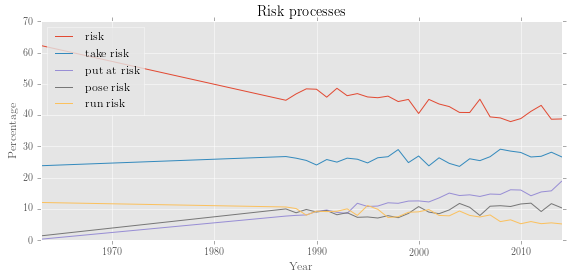

In [30]:
plotter('Risk processes', proc_rel.results)

Subordinate processes are often embedded within clauses containing a risk predicator, as in *Obama risks alienating voters*.

In [31]:
# to risk losing/being/having etc
query = r'VBG >># (VP > (S > (VP <<# (/VB.?/ < /(?i).?\brisk.?/))))'
risk_verbing = interrogator(annual_trees, 'words', query, quicksave = 'risk_verbing')

 14:34:24: Finished! 966 unique results, 13906 total.

 14:34:24: Data saved: data/saved_interrogations/risk_verbing.p




***Processing results***


***Done!***



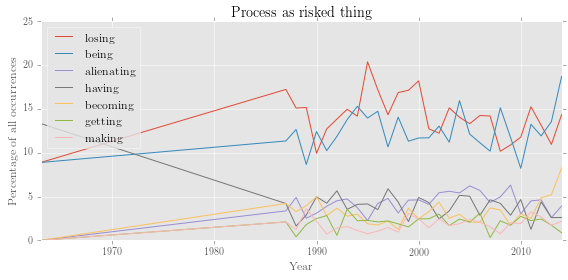

In [32]:
r_verbing = editor(risk_verbing.results, '%', risk_verbing.totals)
plotter('Process as risked thing', r_verbing.results, y_label = 'Percentage of all occurrences')

In this kind of risk process, the risker is typically a powerful member of society. While this is rather explicit in some cases (it's hard to image that a mechanic would risk alienating his/her apprentice), we can observe that this is the case for less obvious examples, like *to risk becoming*:

In [33]:
lines = conc('data/nyt/years/2013', r'VBG < /(?i)becom/ >># (VP > (S > (VP <<# (/VB.?/ < /(?i).?\brisk.?/))))', n = 15, random = True)


14:34:26: Getting concordances for data/nyt/years/2013 ... 
          Query: VBG < /(?i)becom/ >># (VP > (S > (VP <<# (/VB.?/ < /(?i).?\brisk.?/))))

0         the step as significant , it risks   becoming   the latest of many tentative moves      
1        , the stage scene could have risked   becoming   an embarrassment for the brand , but Mr 
2         crisis in the European Union risks   becoming   a crisis of liberal democracy itself    
3      's new remarks that the church risked   becoming   a `` small chapel '' overly fixated on  
4          savings in this area , `` we risk   becoming   an unbalanced force , one that is well  
5     left unaddressed , such practices risk   becoming   more and more entrenched , '' Ann       
6      , '' or else the Vatican offices risk   becoming   `` institutions of censorship           
7                          Switzerland risks   becoming   one of the most restrictive places for  
8   than race the clock to Bed-Stuy and risk   becoming  

### Subjects of risk processes

In [34]:
query = r'/NN.?/ !< /(?i).?\brisk.?/ >># (@NP $ (VP <+(VP) (VP ( <<# (/VB.?/ < /(?i).?\brisk.?/) | <<# (/VB.?/ < /(?i)(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts|pose|poses|posed|posing)/) < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))))'
subj_of_risk_process = interrogator(annual_trees, 'words', query, 
                                    lemmatise = True, quicksave = 'subj_of_risk_process')

 14:45:55: Finished! 2491 unique results, 10049 total.

 14:45:55: Data saved: data/saved_interrogations/subj_of_risk_process.p



In [61]:
quickview(subj_of_risk_process)

  0: person (n=287)
  1: company (n=214)
  2: bank (n=143)
  3: investor (n=101)
  4: state (n=101)
  5: government (n=101)
  6: man (n=74)
  7: leader (n=71)
  8: president (n=61)
  9: woman (n=60)
 10: official (n=58)
 11: player (n=58)
 12: administration (n=53)
 13: bush (n=52)
 14: obama (n=50)
 15: democrat (n=48)
 16: republican (n=46)
 17: american (n=46)
 18: firm (n=46)
 19: member (n=44)
 20: team (n=44)
 21: fund (n=43)
 22: failure (n=42)
 23: worker (n=41)
 24: israel (n=40)


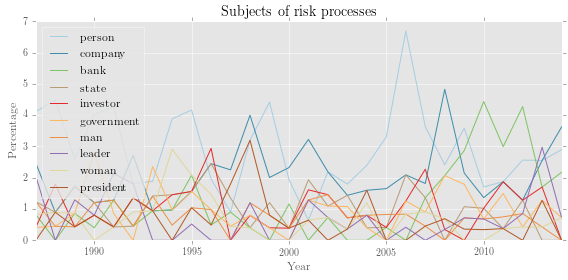

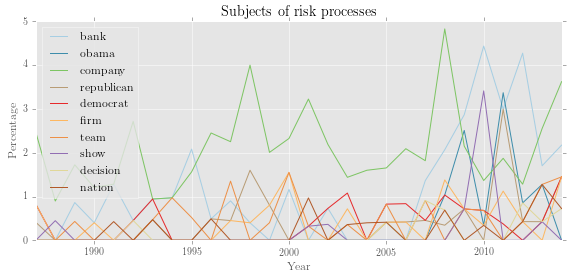

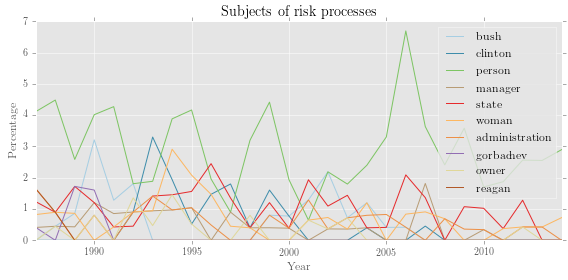

In [65]:
for s in ['total', 'increase', 'decrease']:
    with_sort = editor(subj_of_risk_process.results, '%', subj_of_risk_process.totals,
                       sort_by = s, skip_subcorpora = [1963], print_info = False)
    plotter('Subjects of risk processes', with_sort.results, num_to_plot = 10)

In [66]:
inst = ['government', 'bank', 'senator', 'republican', 
        'democrat', 'senate', 'congress', 'agency', 'firm']
peop = ['man', 'person', 'woman', 'child', 'baby', 'worker', 'consumer']
cats = editor(subj_of_risk_process.results, merge_entries = inst, newname = 'Institutions')
cats = editor(cats.results, merge_entries = peop, newname = 'People', 
              just_entries = ['Institutions', 'People'], sort_by = 'total')


***Processing results***

Merging 9 entries as "Institutions":
    government
    bank
    senator
    republican
    democrat
    senate
    congress
    agency
    firm


***Done!***


***Processing results***

Merging 7 entries as "People":
    man
    person
    woman
    child
    baby
    worker
    consumer

Keeping 2 entries:
    Institutions
    People


***Done!***



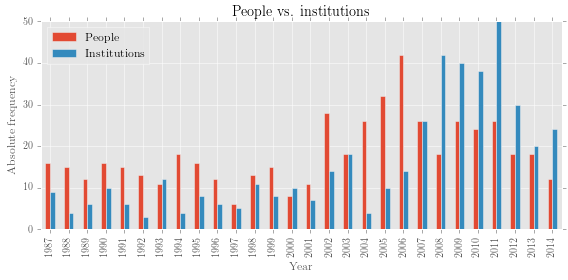

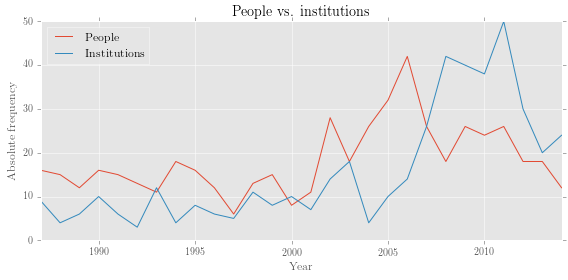

In [67]:
for k in ['bar', 'line']:
    plotter('People vs. institutions', cats.results.drop('1963'), kind = k)

### Risker value

A novel thing we can do with our data is determine the amount of time a word occurs in a given role. We know that Bush, Clinton, woman, bank, and child are common nouns in the corpus, but we do not yet know what percentage of the time they are playing a specific role in the risk frame.

To determine what percentage of the time these words take the role of risker, we start by counting their occurrences as risker, and in the corpus as a whole:

In [64]:
n_query = r'/NN.?/ !< /(?i).?\brisk.?/ >># NP'
noun_lemmata = interrogator(annual_trees, 'words', n_query, lemmatise = True, quicksave = 'noun_lemmata')

 10:05:47: Finished! 78755 unique results, 4297593 total.

 10:06:04: Data saved: data/saved_interrogations/noun_lemmata.p



Then, we pass `editor()` a second list of results, rather than just totals, and use the `just_totals = True'` argument:

In [35]:
subj_of_risk_process = load_result('subj_of_risk_process')
noun_lemmata = load_result('noun_lemmata')
rel_risker = editor(subj_of_risk_process.results, '%', noun_lemmata.results, just_totals = True, sort_by = 'total')


***Processing results***

Threshold: 859

Removing 77822 entries below threshold:
    alcohol
    dealer
    search
    faith
    portion
    ...
    recitalist
    recirculation
    recife
    reciever
    landlubber
... and 77812 more ... 


***Done!***



Note that a `threshold` was printed. This number represents the minimum number of times an entry must occur in `noun_lemmata.totals` in order for the result to count.

We can pass in a threshold of our own. Note that if we set it to zero, unusual words are at the top of the results list:

In [71]:
rel_risker = editor(subj_of_risk_process.results, '%', noun_lemmata.results, 
             just_totals = True, threshold = 1, sort_by = 'total')
print rel_risker.results


***Processing results***

Threshold: 1



***Done!***

u.n.h.c.r.    100
passie        100
kamensky      100
...
point    0.014100
stock    0.012872
cost     0.011546
Name: Combined total, Length: 2491, dtype: float64


Aside from giving it an integer value, you can pass it `'low'`, `'medium'` or `'high'`.  `editor()` then creates thresholds based on the total total of `noun_lemmata.totals`. Passing no threshold results in '`medium` being used as the default (total words in second list / 5000):

In [72]:
#total / 10,000
tmp = editor(subj_of_risk_process.results, '%', noun_lemmata.results, 
    just_totals = True, threshold = 'low', sort_by = 'total')
#total / 5,000
tmp = editor(subj_of_risk_process.results, '%', noun_lemmata.results, 
    just_totals = True, threshold = 'medium', sort_by = 'total')
#total / 2,500
rel_risker = editor(subj_of_risk_process.results, '%', noun_lemmata.results, 
    just_totals = True, threshold = 'high', sort_by = 'total')


***Processing results***

Threshold: 429

Removing 77126 entries below threshold:
    complexity
    aug.
    carolina
    concession
    hurricane
    ...
    recitalist
    recirculation
    recife
    reciever
    landlubber
... and 77116 more ... 


***Done!***


***Processing results***

Threshold: 859

Removing 77822 entries below threshold:
    alcohol
    dealer
    search
    faith
    portion
    ...
    recitalist
    recirculation
    recife
    reciever
    landlubber
... and 77812 more ... 


***Done!***


***Processing results***

Threshold: 1718

Removing 78262 entries below threshold:
    minister
    cholesterol
    base
    reputation
    majority
    ...
    recitalist
    recirculation
    recife
    reciever
    landlubber
... and 78252 more ... 


***Done!***



OK, let's see what we have:


***Processing results***

Skipping 16 entries:
    life
    everything
    money
    health
    career
    reputation
    capital
    future
    safety
    job
... and 6 more ... 


***Done!***


***Processing results***

Keeping 16 entries:
    life
    everything
    money
    health
    career
    reputation
    capital
    future
    safety
    job
... and 6 more ... 


***Done!***



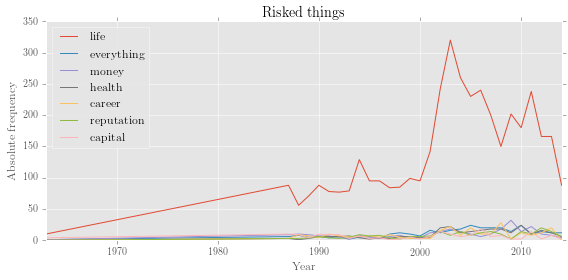

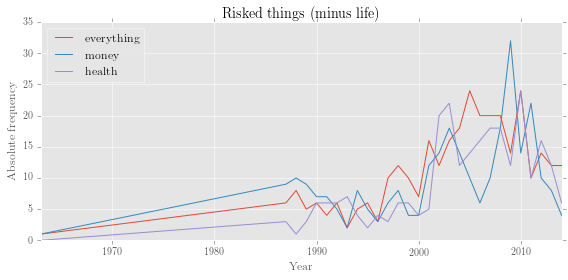

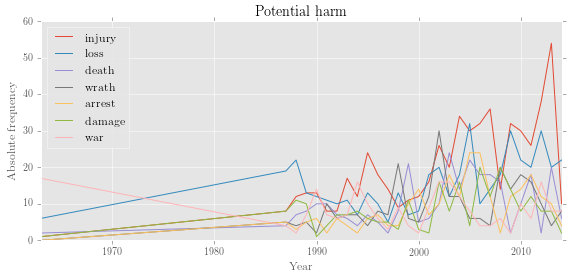

In [45]:
riskobject_regex = (r'(?i)^\b(life|everything|money|career|health|reputation|capital|future|'
    r'job|safety|possibility|anything|return|neck|nothing|lot)$\b')
riskedthings = editor(risk_objects.results, skip_entries = riskobject_regex)
potentialharm = editor(risk_objects.results, just_entries = riskobject_regex)
plotter('Risked things', potentialharm.results, num_to_plot = 7)

# a method for quickly removing entries from the plot:
plotter('Risked things (minus life)', potentialharm.results.drop('life', axis = 1), num_to_plot = 3)
plotter('Potential harm', riskedthings.results, num_to_plot = 7)

It's interesting how powerful people risk losing and alienating electorates, fanbases or contracts, while less powerful people risk their jobs and safety, or their life or neck.

### Risk as modifier

Risk words can serve as modifiers in a number of ways. We divided risk as modifier into five main types.

| Modifier type | Example  |
|---|---|
| Adjectival modifiers of participants  |  *the riskiest decision* | 
| Pre-head nominal modifiers of participants  |  *risk management* | 
|  Post-head nominal modifiers of participants |  *the money to risk* | 
| Adverbial modifiers of processes  |  *it riskily moved* | 
| As head of NP that is head of a cirumstance  | *she was at risk*  | 

In [64]:
query = ([u'Adjectival modifier', r'/NN.?/ >># (NP < (/JJ.?/ < /(?i).?\brisk.?/))'],
    [u'Pre-head nominal modifier', r'/NN.?/ < /(?i).?\brisk.?/ $ (/NN.?/ >># NP !> CC)'], 
    [u'Post-head modifier', r'/NN.?/ >># (NP < (PP < (NP <<# /(?i).?\brisk.?/)))'], 
    [u'Adverbial modifier', r'RB < /(?i).?\brisk.?/'],
    [u'Circumstance head', r'/NN.?/ < /(?i).?\brisk.?/ >># (NP > (PP > (VP > /\b(S|SBAR|ROOT)\b/)))'])
modifiers = multiquery(annual_trees, query, quicksave = 'modifiers')

 20:46:29: Finished! 5 unique results, 107208 total.

 20:46:29: Data saved: data/saved_interrogations/modifiers.p



Here are a few examples of each type:

In [28]:
for name, q in query:
    print '\n%s:' % name
    l = conc('data/nyt/years/2012', q, n = 5, random = True)


Adjectival modifier:

15:12:58: Getting concordances for data/nyt/years/2012 ... 
          Query: /NN.?/ >># (NP < (/JJ.?/ < /(?i).?\brisk.?/))

0    roped borrowers into risky , high-cost        loans   they could not understand or afford     
1  back to 2008 , when Wall Street 's risky   activities   nearly toppled the financial system and 
2  risk managers need to shed risk-weighted       assets   , and that makes these types of         
3   extensive investigations about low-risk    employees   like themselves who did not have        
4  encouraging localities to treat low-risk    offenders   in community-based programs             

Pre-head nominal modifier:

15:15:13: Getting concordances for data/nyt/years/2012 ... 
          Query: /NN.?/ < /(?i).?\brisk.?/ $ (/NN.?/ >># NP !> CC)

0    to have firsthand knowledge about the   risk   factors among offenders , which gives   
1     a higher body mass index was a major   risk   factor for acne , `` especially         
2         


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***



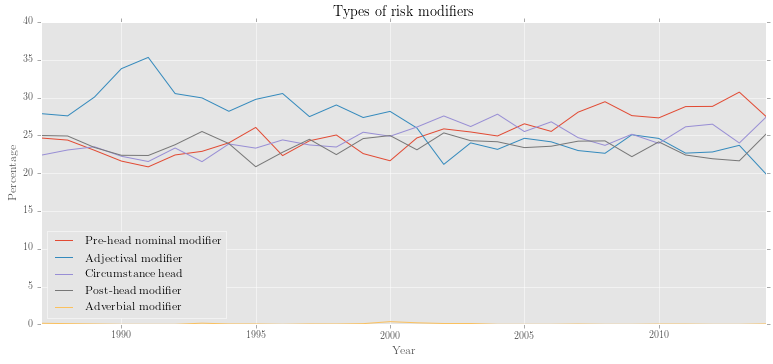

In [484]:
plotter('Types of risk modifiers', editor(modifiers.results, '%', modifiers.totals, skip_subcorpora = [1963]).results)

This is very interesting: the most common form in 1987 has become the least common in 2014!

We can also pull out words modified by adjectival risk:

In [421]:
# Participants modified by risk word
query = r'/NN.?/ >># (NP < (/JJ.?/ < /(?i).?\brisk.?/) ( > VP | $ VP))'
mod_by_adj_risk = interrogator(annual_trees, 'words', query, 
    lemmatise = True, titlefilter = False, quicksave = 'mod_by_adj_risk')

 20:47:48: Finished! 897 unique results, 8705 total.


In [68]:
mod_by_adj_risk = load_result('mod_by_adj_risk')
plotter('Participants modified by risk', mod_by_adj_risk.results, 
    num_to_plot = 7)

IOError: [Errno 2] No such file or directory: 'data/saved_interrogations/mod_by_adj_risk.p'

We looked at the most common adjectival risks already. We can load that now, and look at the query to make sure:

In [47]:
#query = r'/JJ.?/ < /(?i).?\brisk.?/'
#adjrisks = interrogator(annual_trees, 'words', query, 
    #lemmatise = False, quicksave = 'adjrisks')
adjrisks = load_result('adj_riskwords')

In [48]:
arisk = editor(adjrisks.results, '%', allwords.totals) 


***Processing results***


***Done!***



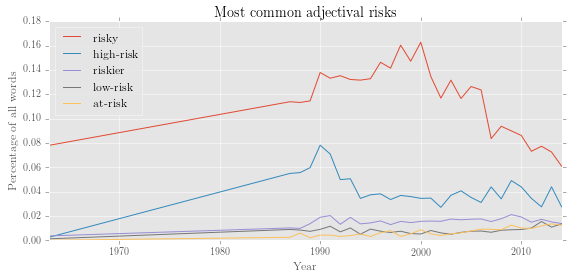

In [49]:
# remember that we can still plot using all words/all risk words 
plotter('Most common adjectival risks', arisk.results, y_label = 'Percentage of all words', num_to_plot = 5)

Given the increasing frequency of at-risk constructions, we then looked at what it is that this modifier typically modifies.

In [786]:
# At-risk thing
query = r'/NN.?/ >># (NP < (/JJ.?/ < /(?i).?\bat-risk/) ( > VP | $ VP))'
at_risk_things = interrogator(annual_trees, 'words', query, lemmatise = True, quicksave = 'at_risk_things')

 22:26:20: Finished! 61 unique results, 377 total.

 22:26:20: Data saved: data/saved_interrogations/at_risk_things.p



In [134]:
at_risk_things = load_result('at_risk_things')
a_r_t = editor(at_risk_things.results, '%', at_risk_things.totals, skip_subcorpora = [1963], just_totals = True)


***Processing results***

Skipping 1 subcorpora:
    1963


***Done!***



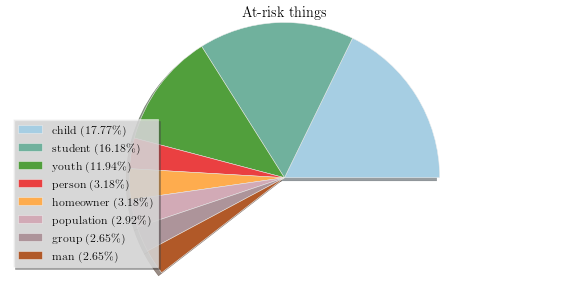

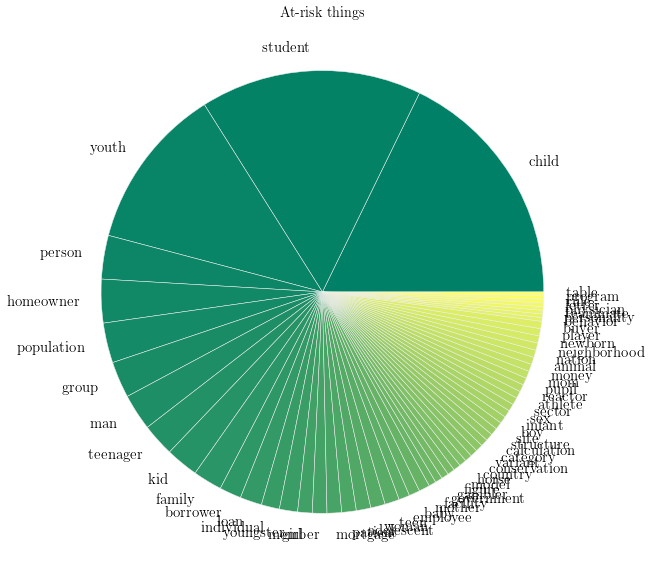

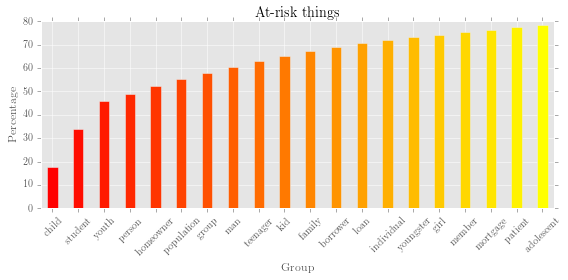

In [143]:
plotter('At-risk things', a_r_t.results, kind = 'pie', num_to_plot = 8, partial_pie = True, 
        show_totals = 'legend', shadow = True)
plotter('At-risk things', a_r_t.results, kind = 'pie', num_to_plot = 'all',
        colours = 'summer', show_totals = False, pie_legend = False, fontsize = 15, figsize = (7, 8))
plotter('At-risk things', a_r_t.results, kind = 'bar', num_to_plot = 20, cumulative = True, colours = 'autumn')

The query below finds both *thing at risk* and *at-risk thing*.

In [50]:
# at-risk person / person at risk combined
query = r'/NN.?/ ( >># (NP < (PP <<# /(?i)at/ << (NP <<# /(?i)\brisk.?/))) | ( >># (NP < (/JJ.?/ < /(?i)at-risk.?/))))'
n_atrisk_n = interrogator(annual_trees, 'words', query, 
    lemmatise = False, titlefilter = False, quicksave = 'n_atrisk_n')

 15:52:59: Finished! 1225 unique results, 7044 total.

 15:52:59: Data saved: data/saved_interrogations/n_atrisk_n.p



In [ ]:
n_atrisk_n = load_result('n_atrisk_n')
plotter('At-risk thing or thing at risk', n_atrisk_n.results, legend_pos = 'upper left')

Vulnerable human populations are the main theme of this category: indeed, it's difficult to imagine *at-risk corporations* or *at-risk leaders*.

### Proper nouns and risk sentences

We searched to find the most common proper noun strings.

`interrogator()`'s `titlefilter` option removes common titles, first names and determiners to make for more accurate counts. It is useful when the results being returned are groups/phrases, rather than single words.

In [65]:
# Most common proper noun phrases
query = r'NP <# NNP >> (ROOT << /(?i).?\brisk.?\b/)'
propernouns = interrogator(annual_trees, 'words', query, 
    titlefilter = True, quicksave = 'propernouns')

 16:32:33: Finished! 68004 unique results, 280355 total.

 16:32:38: Data saved: data/saved_interrogations/propernouns.p



In [ ]:
propernouns = load_result('propernouns')
for s in ['total', 'increase', 'decrease']:
    r = editor(propernouns.results, '%', propernouns.totals, skip_subcorpora=[1963], sort_by = s, print_info = False)
    plotter('Most common proper noun phrases', r.results, num_to_plot = 9)

In [491]:
quickview(propernouns, n = 200)

  0: new york (n=2215)
  1: congress (n=1869)
  2: washington (n=1639)
  3: iraq (n=1583)
  4: university (n=1519)
  5: bush (n=1517)
  6: china (n=1207)
  7: fed (n=1173)
  8: europe (n=1090)
  9: obama (n=1032)
 10: america (n=970)
 11: f.d.a . (n=956)
 12: wall street (n=926)
 13: clinton (n=887)
 14: israel (n=873)
 15: tuesday (n=839)
 16: vioxx (n=805)
 17: russia (n=765)
 18: wednesday (n=761)
 19: food and drug administration (n=724)
 20: thursday (n=695)
 21: merck (n=683)
 22: white house (n=683)
 23: aids (n=674)
 24: japan (n=663)
 25: friday (n=643)
 26: california (n=608)
 27: london (n=608)
 28: monday (n=602)
 29: iran (n=577)
 30: federal reserve (n=562)
 31: medicine (n=536)
 32: greenspan (n=516)
 33: manhattan (n=515)
 34: afghanistan (n=502)
 35: bank (n=487)
 36: new york city (n=483)
 37: president (n=474)
 38: u.s . (n=470)
 39: department (n=466)
 40: britain (n=452)
 41: germany (n=394)
 42: democrat (n=394)
 43: center (n=388)
 44: senate (n=372)
 45: france 

Notice that there are a few entries here that refer to the same group. (*f.d.a.* and *food and drug administration*, for example). We can use `editor()` to fix these.

In [1]:
to_merge = [("f.d.a .", "food and drug administration"),
    ("fed", "federal reserve"),
    ("s.e.c .", "securities and exchange commission"),
    ("disease control", "disease control and prevention"),
    ("goldman sachs", "goldman"),
    ("e.p.a .", "envi,ronmental protection agency"),
    ("calif .", "california"),
    ("i.m.f .", "international monetary fund")]
propernouns = load_result('propernouns') # just in case
for short, lon in to_merge:
    propernouns = editor(propernouns.results, '%', propernouns.totals, merge_entries = [short, lon], 
                         newname = short, print_info = False)
propernouns = editor(propernouns.results, sort_by = 'total', print_info = False)
propernouns.results

,new york,congress,washington,fed,...,jerry flum,teknecon energy risk advisors,ray mercer,richard p. howard
1963,1.010101,0.589226,0.336700,0.000000,...,0,0,0,0
1987,0.604458,1.057801,0.604458,0.453343,...,0,0,0,0
1988,0.805802,0.906527,0.342466,0.483481,...,0,0,0,0
1989,0.866183,0.866183,0.512639,0.618702,...,0,0,0,0
1990,0.896179,0.659452,0.591816,0.507271,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010,0.979880,0.862294,0.770839,1.215051,...,0,0,0,0
2011,0.475475,0.625626,0.800801,0.750751,...,0,0,0,0
2012,0.856760,0.589023,0.709505,0.495315,...,0,0,0,0
2013,0.404858,0.558425,0.991205,0.767835,...,0,0,0,0


Now that we've merged some common results, we can build some basic thematic categories. Let's make a list of lists:

In [2]:
theme_list = [['People', r'(?i)^\b(bush|clinton|obama|greenspan|gore|johnson|mccain|romney|kennedy|giuliani|reagan)$\b'],
    ['Nations', r'(?i)^\b(iraq|china|america|israel|russia|japan|frace|germany|iran|britain|u\.s\.|afghanistan|australia|canada|spain|mexico|pakistan|soviet union|india)$\b'],
    ['Geopolitical entities', r'(?i)^\b(middle east|asia|europe|america|soviet union|european union)$\b'],
    ['US places', r'(?i)^\b(new york|washington|wall street|california|manhattan|new york city|new jersey|north korea|italy|greece|bosniaboston|los angeles|broadway|texas)$\b'],
    ['Companies', r'(?i)^\b(merck|avandia|citigroup|pfizer|bayer|enron|apple|microsoft|empire)$\b'],
    ['Organisations', r'(?i)^\b(white house|congress|federal reserve|nasa|pentagon|f\.d\.a \.|c\.i\.a \.|f\.b\.i \.|e\.p\.a \.)$'],
    ['Medical', r'(?i)^\b(vioxx|aids|aid|celebrex|f\.d\.a \.|pfizer|bayer|merck|avandia)$']]

We can add each result to its entry in `theme_list`, and give the `totals` a name:

In [3]:
# add data to our sublists
for entry in theme_list:
    entry.append(editor(propernouns.results, '%', propernouns.totals, 
                  just_entries = entry[1], print_info = False))
    # rename the newly created data
    entry[2].totals.name = entry[0]

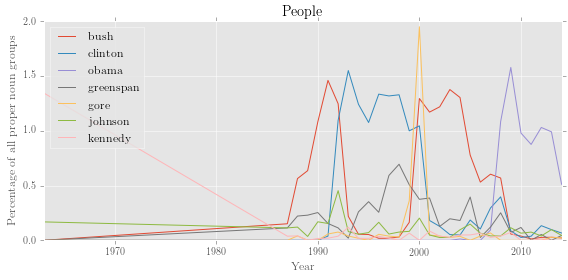

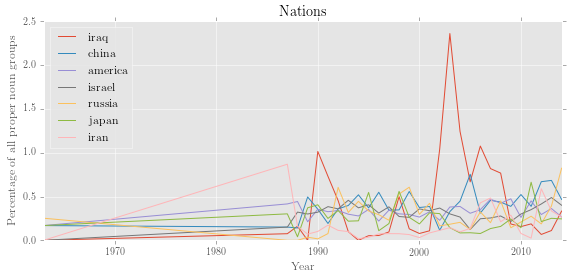

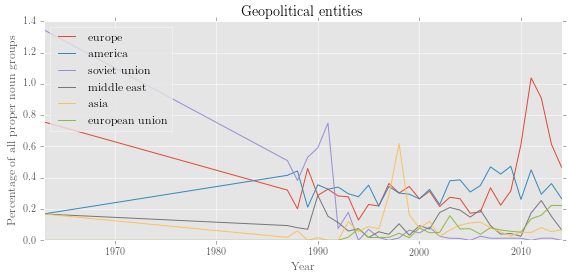

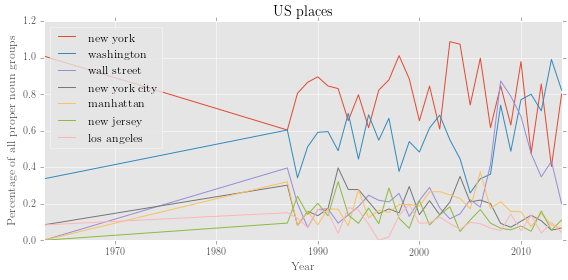

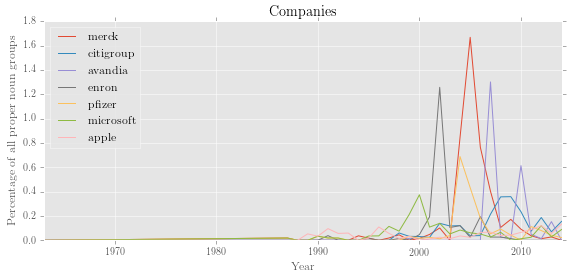

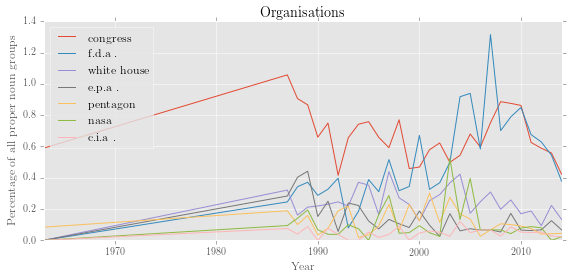

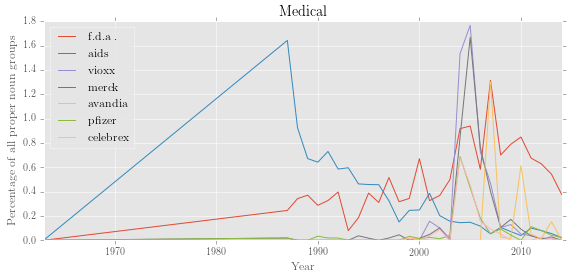

In [4]:
# plot some results
ystring = 'Percentage of all proper noun groups'
for name, query, data in theme_list:
    plotter(name, data.results, y_label = ystring, legend_pos = 'upper left')

Let's compare these topics in the same chart, using Pandas to join everything together:

In [5]:
import pandas
# get the totals from each theme and put them together
them_comp = pandas.concat([data.totals for name, query, data in theme_list], axis=1)
them_comp = editor(them_comp, sort_by = 'total')
quickview(them_comp)


***Processing results***


***Done!***

  0: Nations
  1: US places
  2: People
  3: Organisations
  4: Medical
  5: Geopolitical entities
  6: Companies


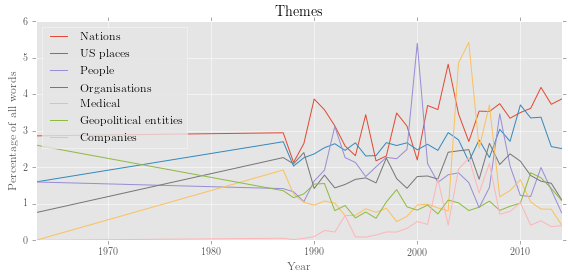

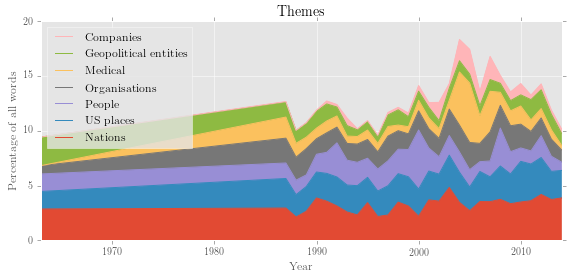

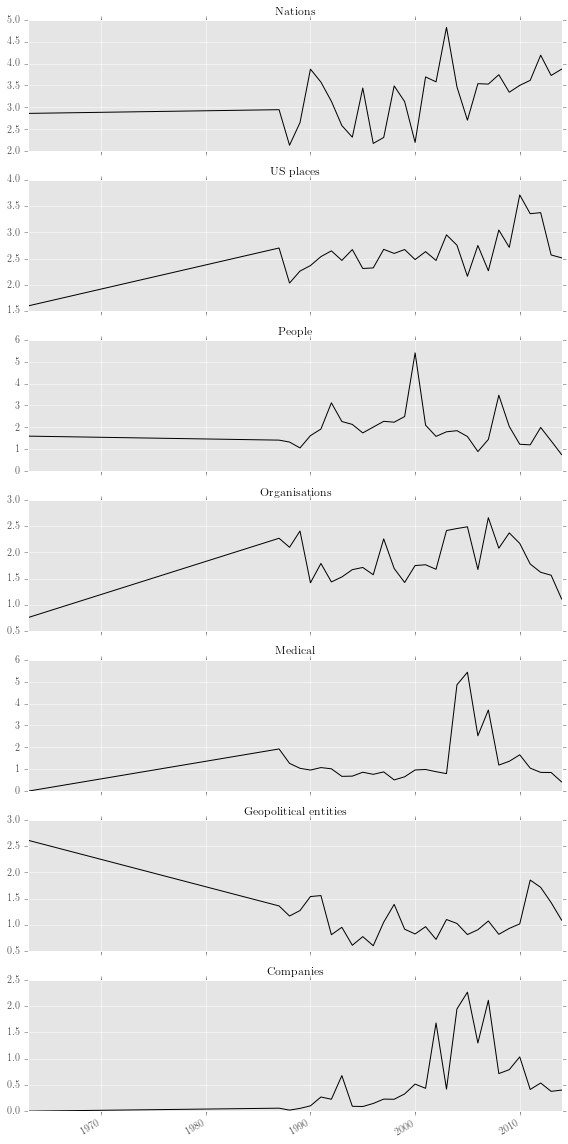

In [8]:
plotter('Themes', them_comp.results, y_label = 'Percentage of all words')
plotter('Themes', them_comp.results, kind = 'area', stacked = True, y_label = 'Percentage of all words')
plotter('Themes', them_comp.results, subplots = True, y_label = 'Percentage of all words', figsize = (8, 16))

These charts reveal some interesting patterns.

* We can clearly see presidencies and rival candidates come and go
* Similarly, the wars in Iraq and Afghanistan are easy to spot
* Naturally, the Soviet Union is a very frequent topic in 1963. It rises in frequency until its collapse. More recently, Russia can be seen as more frequently co-occurring with risk words.
* The Eurozone crisis is visible
* From the Organisations and Things, we can see the appearance of Merck and Vioxx in 2004, as well as Empire...


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 2 entries:
    vioxx
    merck


***Done!***



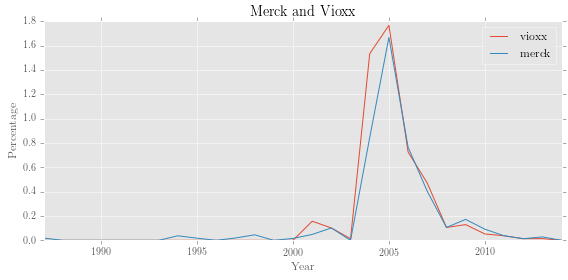

In [158]:
vioxx = editor(propernouns.results, '%', propernouns.totals, just_entries = r'(?i)^\b(vioxx|merck)\b$', skip_subcorpora=1963)
plotter('Merck and Vioxx', vioxx.results)

Vioxx was removed from shelves following the discovery that it increased the risk of heart attack. It's interesting how even though terrorism and war may come to mind when thinking of *risk* in the past 15 years, this health topic is easily more prominent in the data.

## Discussion

OK, that's enough interrogating and plotting for now. Future documents will demonstrate how we can use Stanford Dependencies, instead of parse trees, to understand change in the risk semantic.

### Limitations

A key challenge accounting for the diverse ways in which a semantic meaning can be made in lexis and grammar. If we are interested in how often *money* is the risked thing, we have to design searches that find: 

     She risked her money
     She risked losing her money
     Money was risked
     It was risked money
     The risk of money loss was there
     She took her money from her purse and risked it.

Though we can design queries to match any of these, it is very difficult to automate this process for every possible 'risked thing'. It's also very hard to know when we have finally developed a query that matches everything we want.

An added issue is how to treat things like:

     She didn't risk her money
     She risked no money
     She could risk money

Here, the semantic meanings are very different (the risking of money did not occur), but each would match the queries we designed for the above.

Should these results be counted or excluded? Why?

### References

<a id="eggins"></a>
Eggins, S. (2004). Introduction to systemic functional linguistics. Continuum International Publishing Group.

<a id="firth"></a>
Firth, J. (1957).  *A Synopsis of Linguistic Theory 1930-1955*. In: Studies in Linguistic Analysis, Philological Society, Oxford; reprinted in Palmer, F. (ed.) 1968 Selected Papers of J. R. Firth, Longman, Harlow.

<a id="hallmat"></a>
Halliday, M., & Matthiessen, C. (2004). An Introduction to Functional Grammar. Routledge.

### Work in progress

### Data to load

In [4]:
modals = load_result('modals')
allwords = load_result('allwords')
edited_adj_riskwords = load_result('edited_adj_riskwords')
propernouns = load_result('propernouns')
n_atrisk_n = load_result('n_atrisk_n')
risk_objects = load_result('risk_objects')
subj_of_risk_process = load_result('subj_of_risk_process')
risk_verbing = load_result('risk_verbing')
processes = load_result('processes')
predicators = load_result('predicators')
terror_heart = load_result('terror_heart')
risk_of = load_result('risk_of')
relationals = load_result('relationals')
proc_w_risk_part = load_result('proc_w_risk_part')
functional_role = load_result('functional_role')
riskpos = load_result('riskpos')
baseline = load_result('baseline')
adj_riskwords = load_result('adj_riskwords')
at_risk_things = load_result('at_risk_things')
sayers = load_result('sayers')
noun_lemmata = load_result('noun_lemmata')
x_subj_of_risk_process = load_result('x_subj_of_risk_process')
adj_modifiers = load_result('adj_modifiers')
ngms = load_result('ngms')
modals_lemmatised = load_result('modals_lemmatised')
riskwords = load_result('riskwords')
kwds = load_result('kwds')

In [5]:
from corpkit import load_all_results
r = load_all_results()

12:25:11: adj_modifiers.p loaded as adj_modifiers.
12:25:11: adj_riskwords.p loaded as adj_riskwords.
12:25:13: all_govs.p loaded as all_govs.
12:25:13: allwords.p loaded as allwords.
12:25:13: at_risk_things.p loaded as at_risk_things.
12:25:13: baseline.p loaded as baseline.
12:25:13: edited_adj_riskwords.p loaded as edited_adj_riskwords.
12:25:13: functional_role.p loaded as functional_role.
12:25:14: kwds.p loaded as kwds.
12:25:14: modals.p loaded as modals.
12:25:14: modals_lemmatised.p loaded as modals_lemmatised.
12:25:14: modifiers.p loaded as modifiers.
12:25:14: n_atrisk_n.p loaded as n_atrisk_n.
12:25:19: ngms.p loaded as ngms.
12:25:27: noun_lemmata.p loaded as noun_lemmata.
12:25:27: predicators.p loaded as predicators.
12:25:27: proc_w_risk_part.p loaded as proc_w_risk_part.
12:25:27: processes.p loaded as processes.
12:25:31: propernouns.p loaded as propernouns.
12:25:31: relationals.p loaded as relationals.
12:25:32: risk_objects.p loaded as risk_objects.
12:25:32: ris